# 2020.12.18、2021.1.14に取得したデータを分析する

## 12/25MTG時のToDo
* ~~URL送る　https://www.anaconda.com/products/individual#Downloads~~
* ~~反転時の摩擦係数の急上昇 くさび効果~~
* ~~クリームの吐き出されやすさが速度依存 : 反転時の摩擦係数の急上昇（周期成分）の極大値から吐き出されやすさを推定できる？~~
* ~~速度に対する摩擦係数を取る　周期ごとに分解~~
* ~~極大値に位相ズレがないか確認する~~
* ディリクレ核で反転時における急激な摩擦係数の上昇成分を抜き出す  
→　なんのためにする？予測精度は上がるが分析の助けになるか？  
ディリクレ核よりもピークのインデックスに1を立てた配列の方がよさそう
* ~~測定開始直後と最後のデータは抜く~~

## その他思いついたToDo(優先度低)
* ~~GitHubにpushして共有→所内ネットワークからアクセスできるか確認~~
* 使い方マニュアル作る
* パッケージ化してGitHubに上げる

In [1]:
#### Variables
# Files
v_path_conditions_201218 = 'Data/20201218_condition.csv'
v_path_conditions_210114 = 'Data/20210114_condition.csv'

In [2]:
### Import libraries
import io 
import sys
import pandas as pd
import numpy as np
import requests
import statsmodels.api as sm
from scipy import signal
from scipy import special

#### Visualize related libraries
from matplotlib import pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

#### Self-defined module
sys.path.append('C:/Users/90033353/GoogleDrive_Nagi/Friction')
from frictionData import FrictionData

In [3]:
# Condition
v_data_conditions_201218 = pd.read_csv(v_path_conditions_201218, index_col=0, skiprows=1)
v_data_conditions_210114 = pd.read_csv(v_path_conditions_210114, index_col=0, skiprows=1)
v_data_conditions = pd.concat([v_data_conditions_201218, v_data_conditions_210114])

# Load data
v_frictionData = {}
for i in v_data_conditions.index:
    v_frictionData[str(i)] = FrictionData(str(i), v_data_conditions)

## 生データの描画

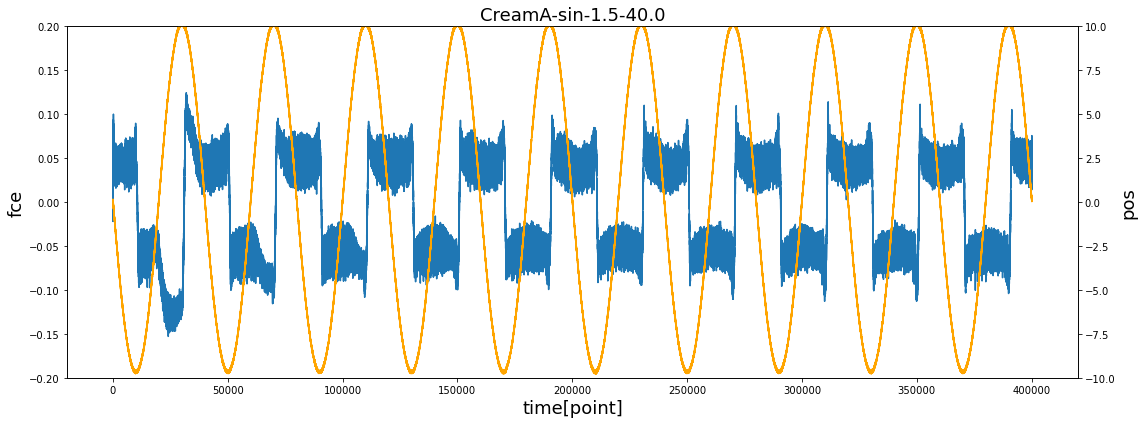

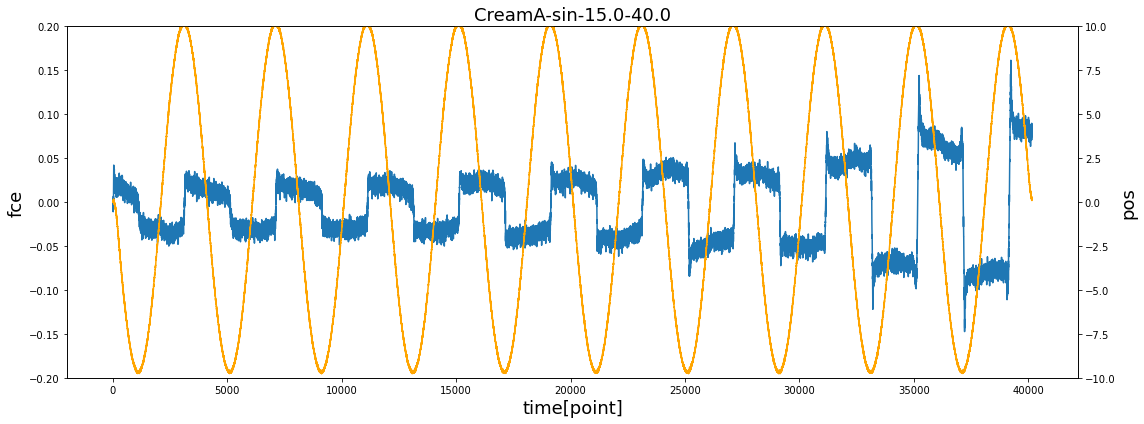

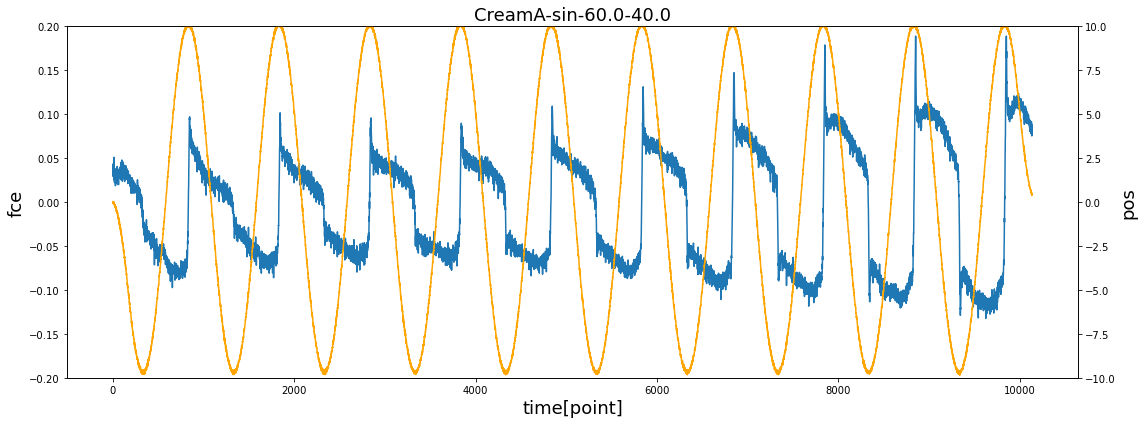

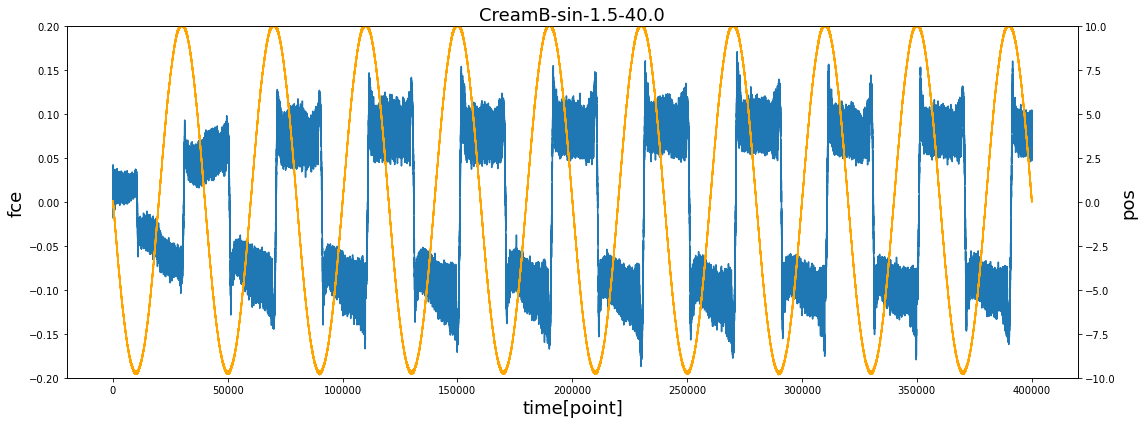

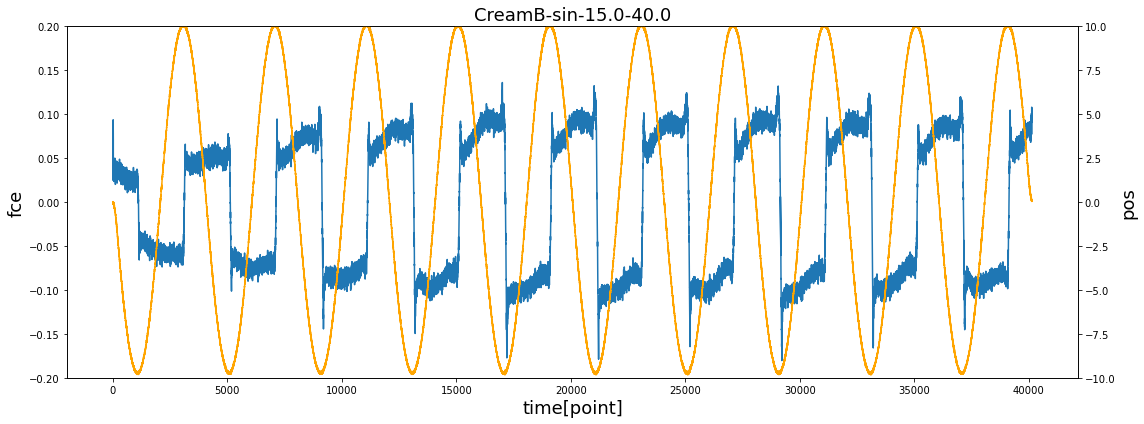

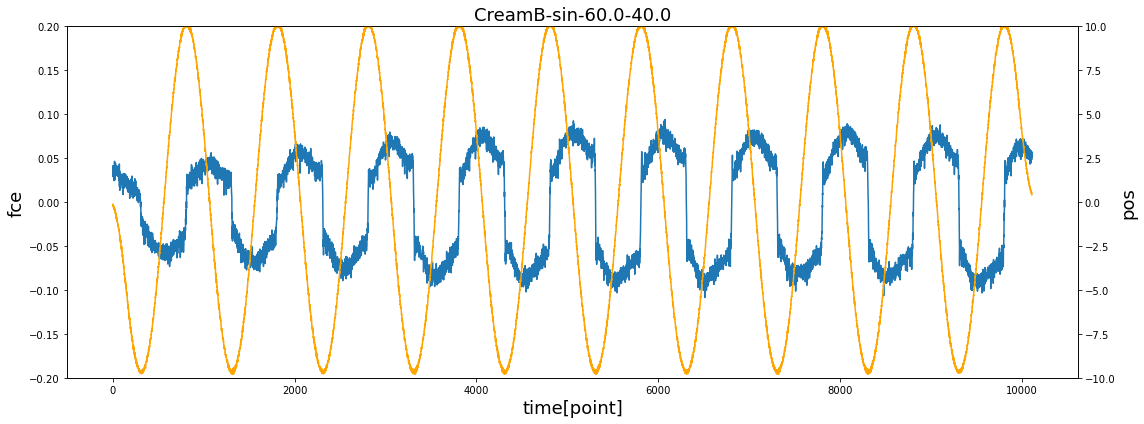

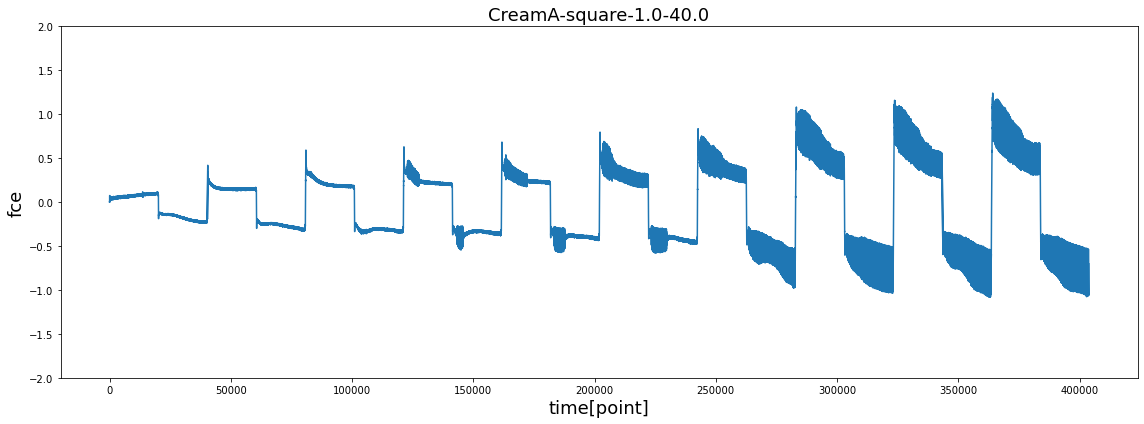

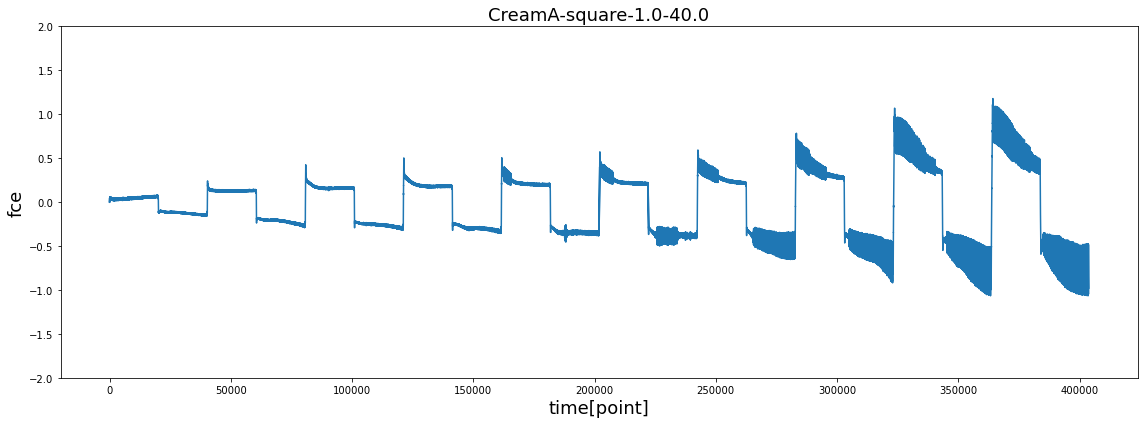

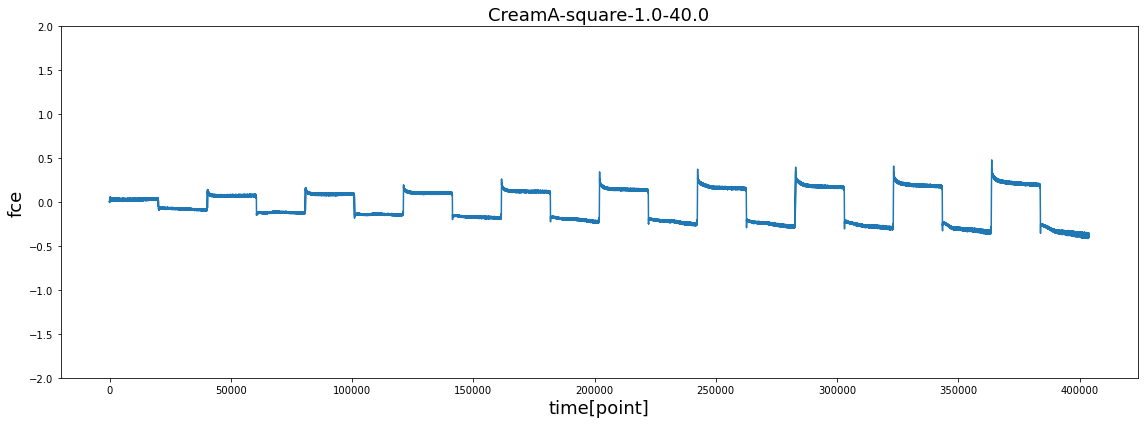

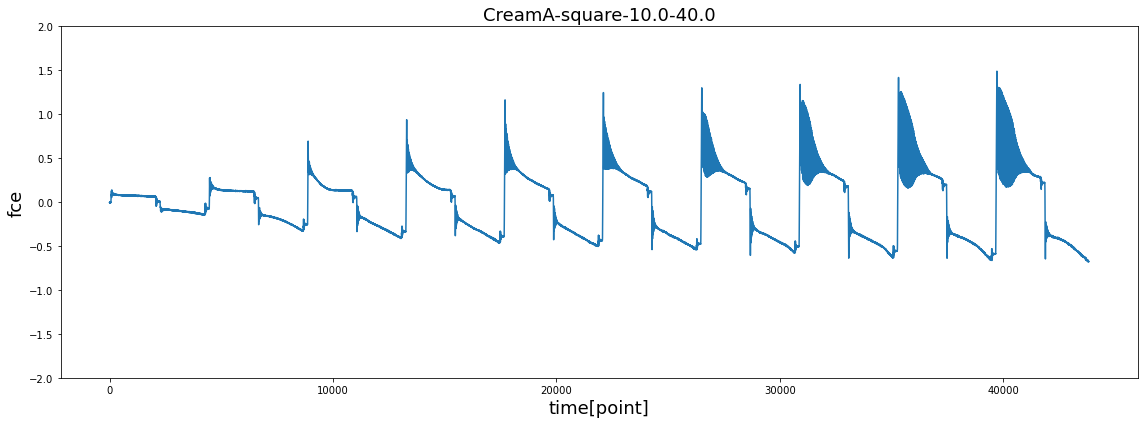

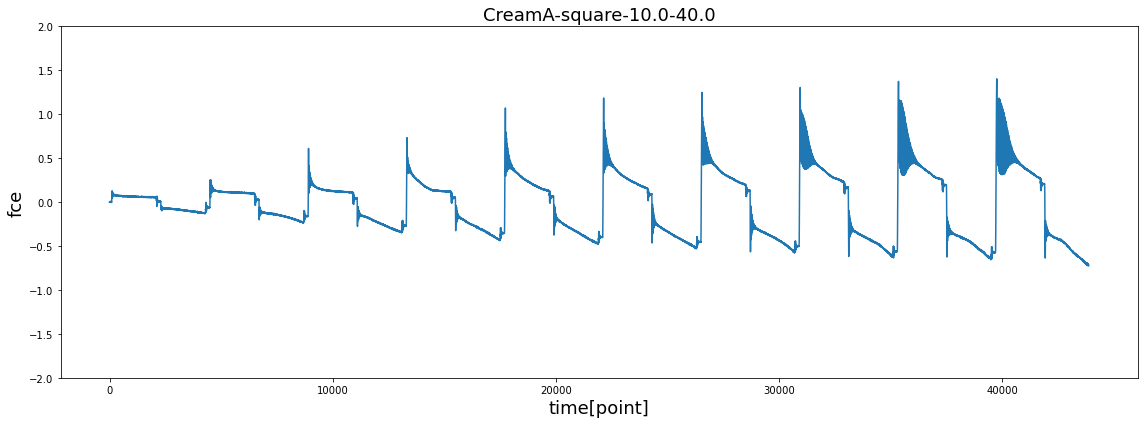

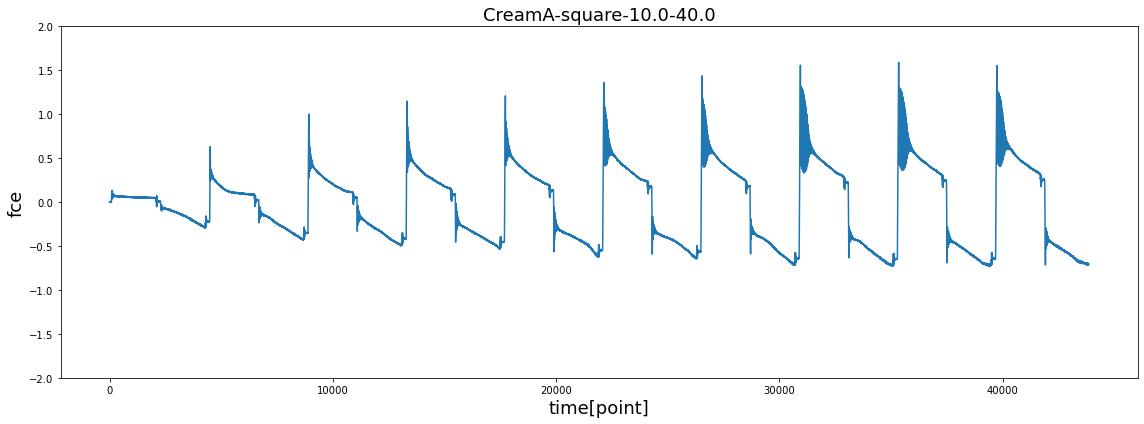

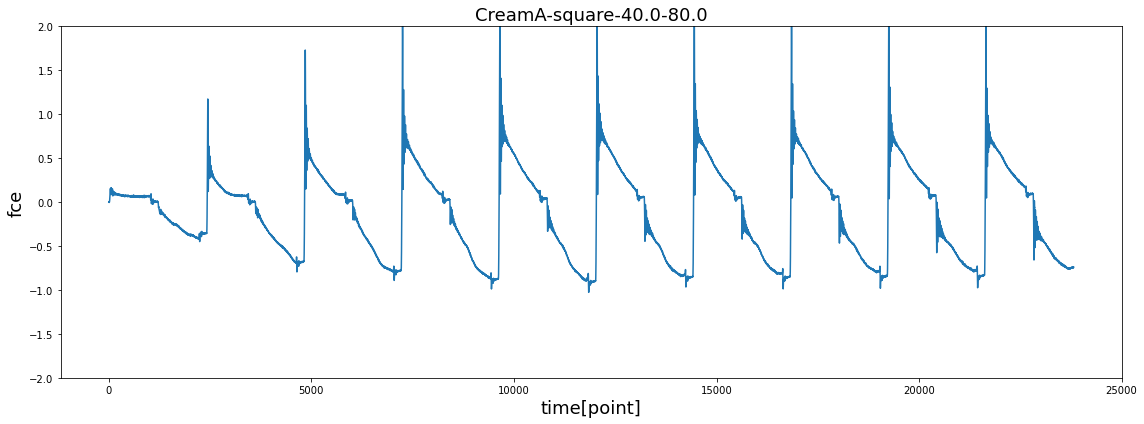

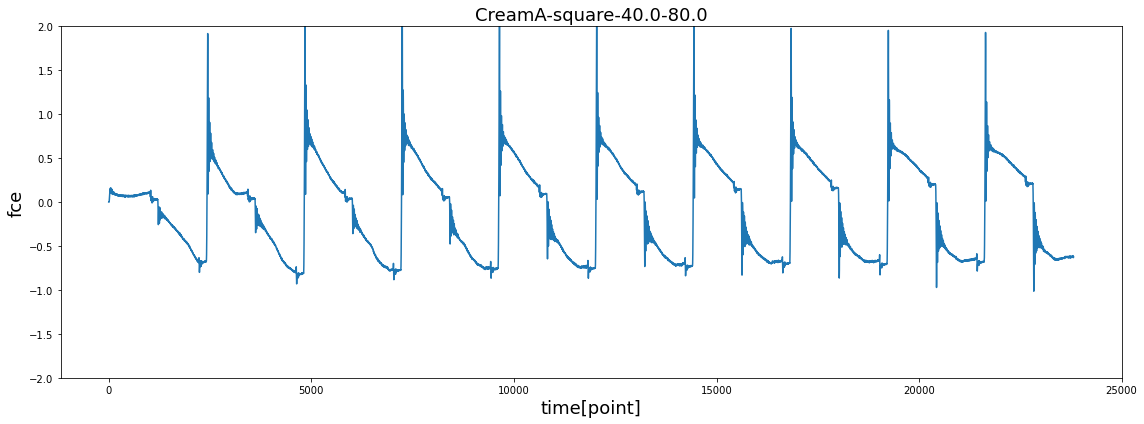

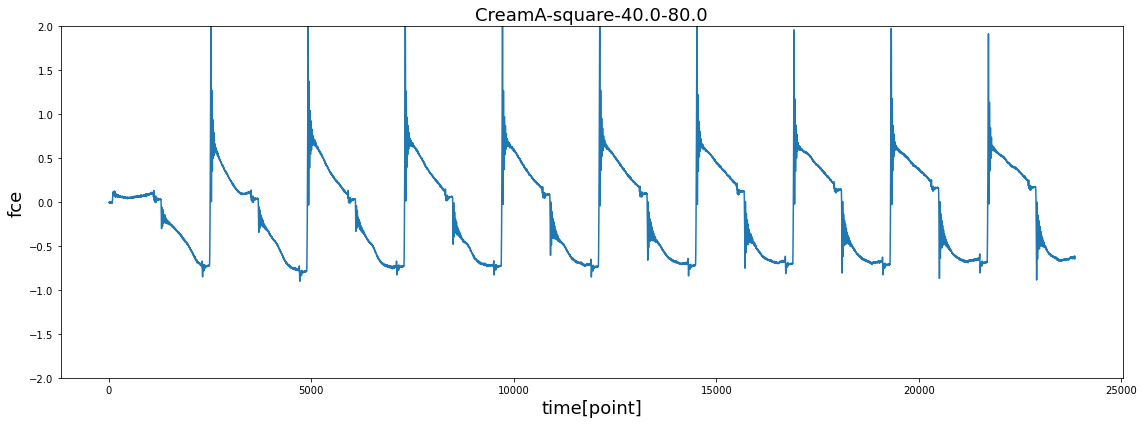

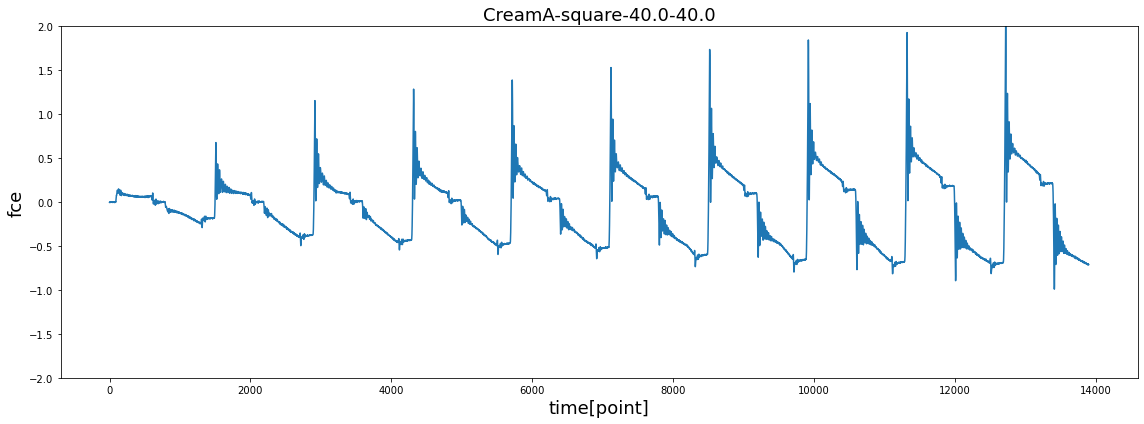

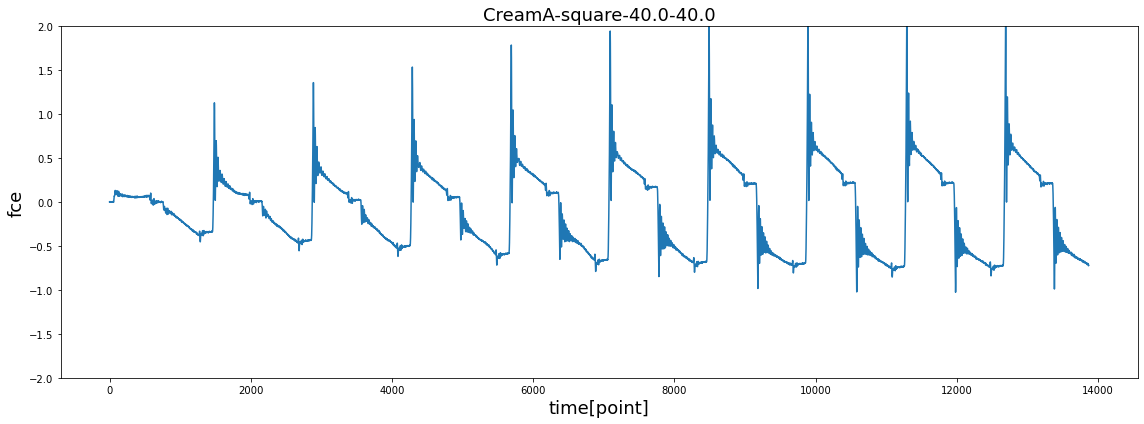

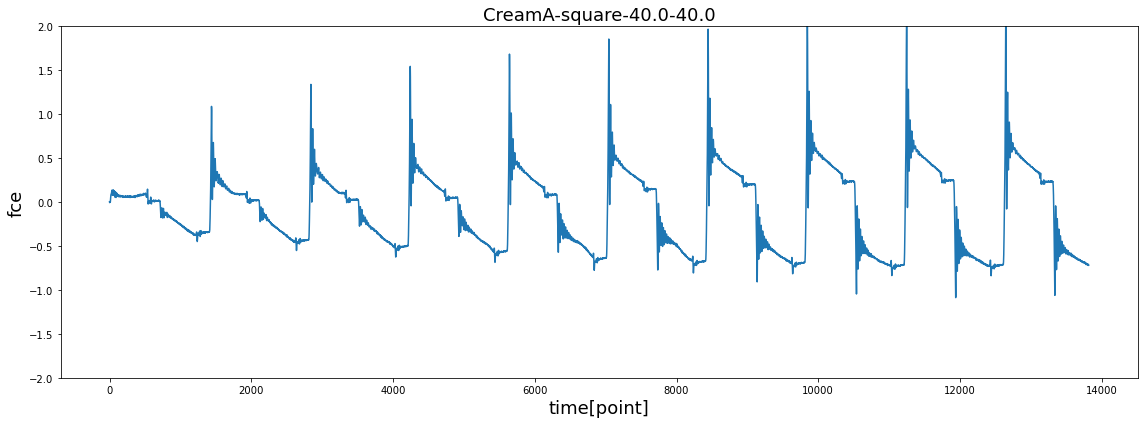

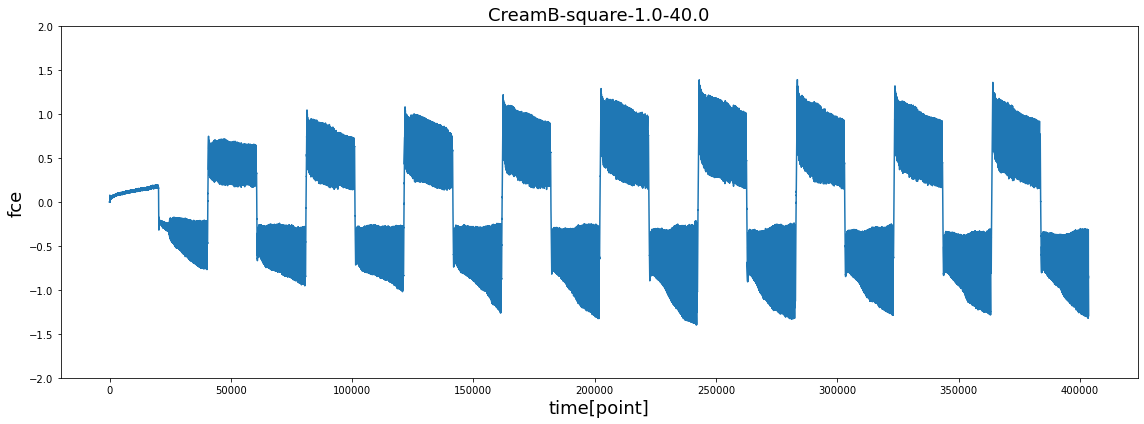

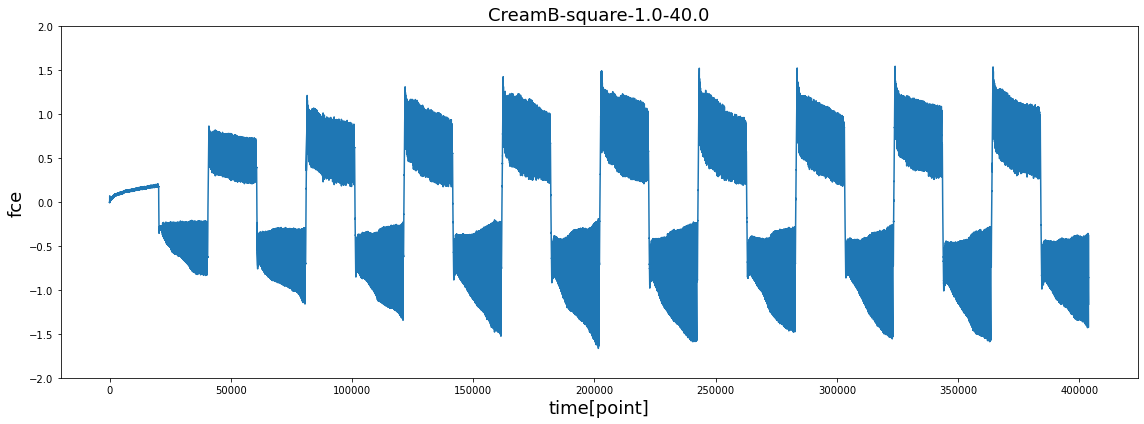

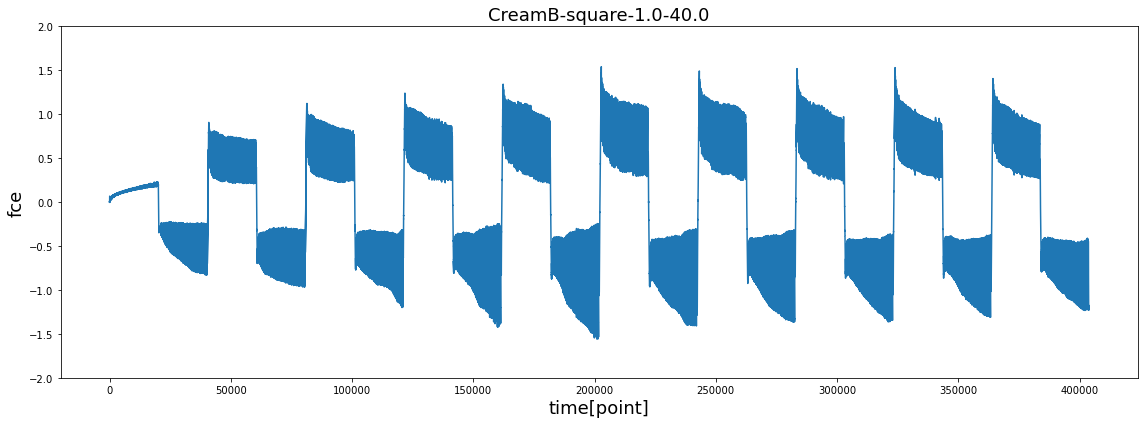

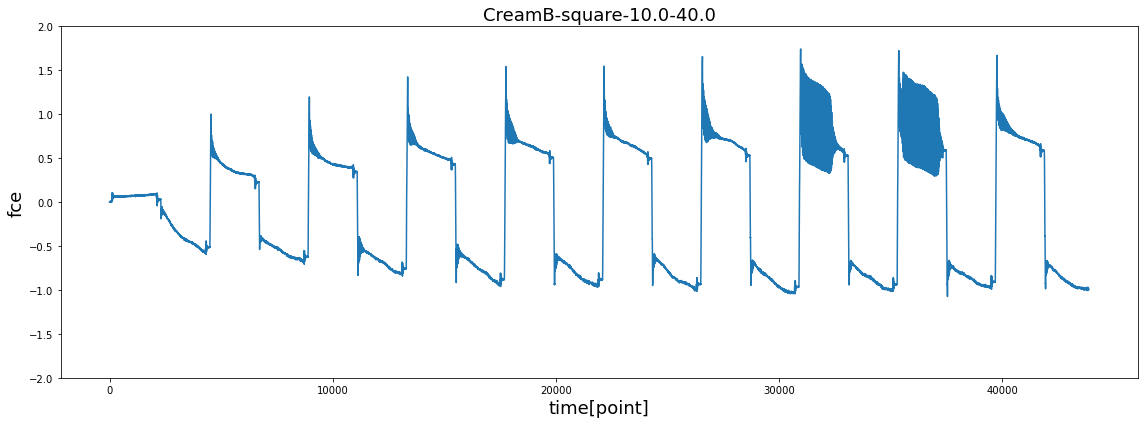

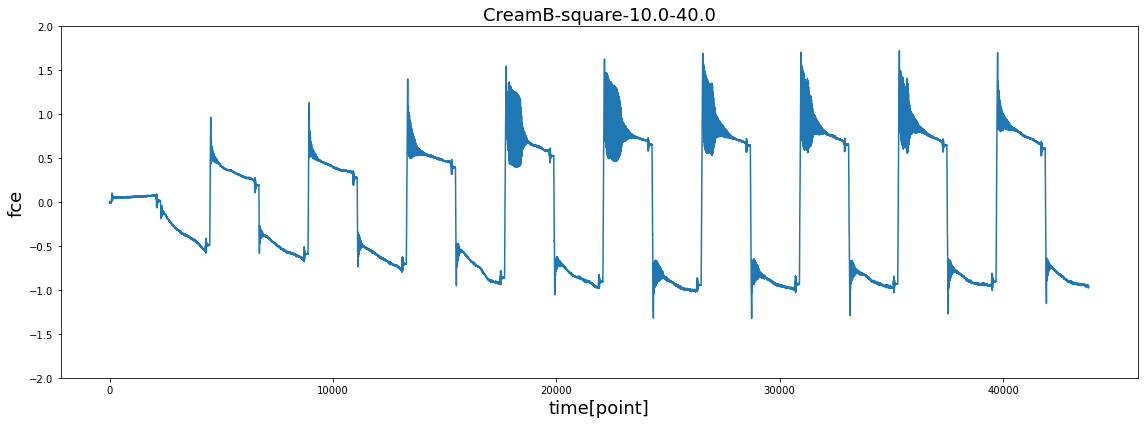

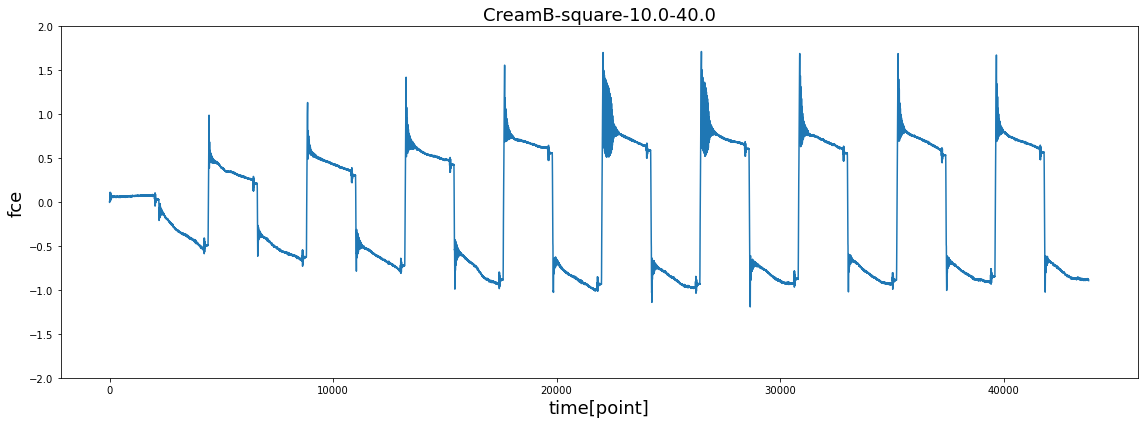

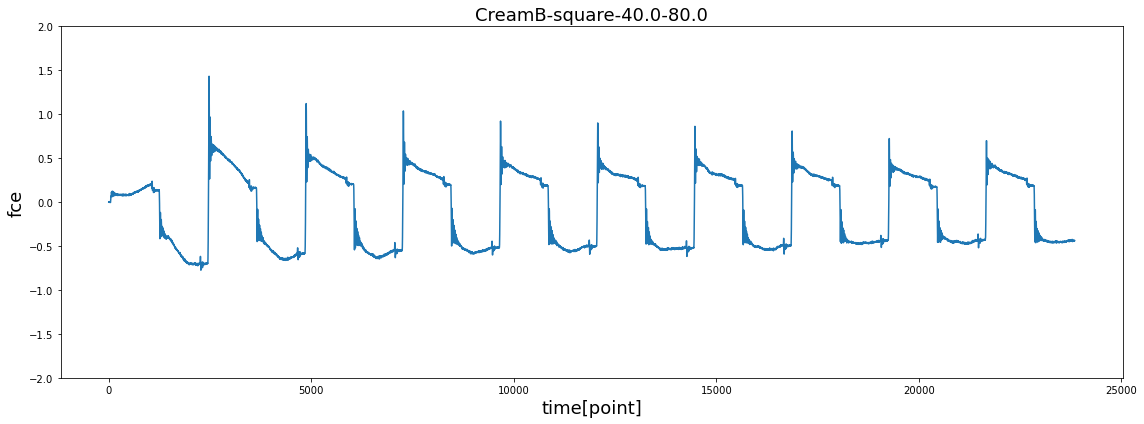

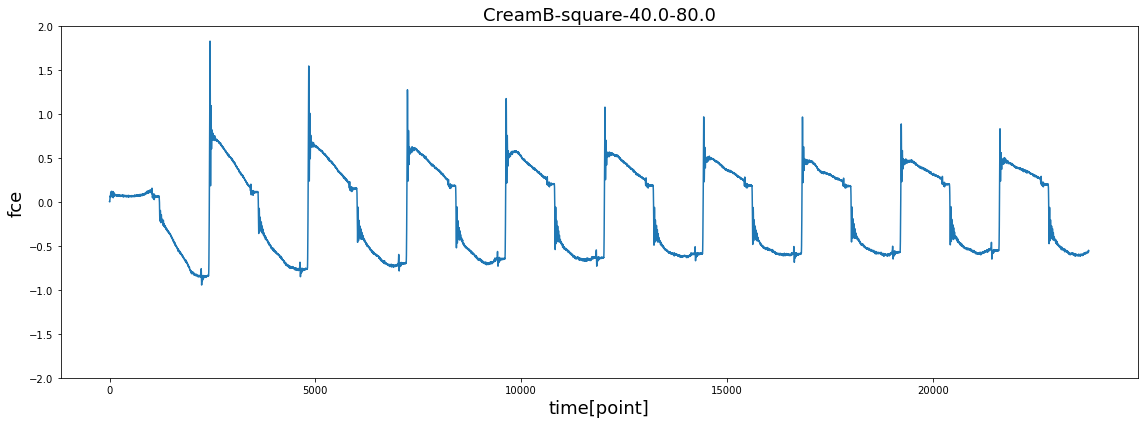

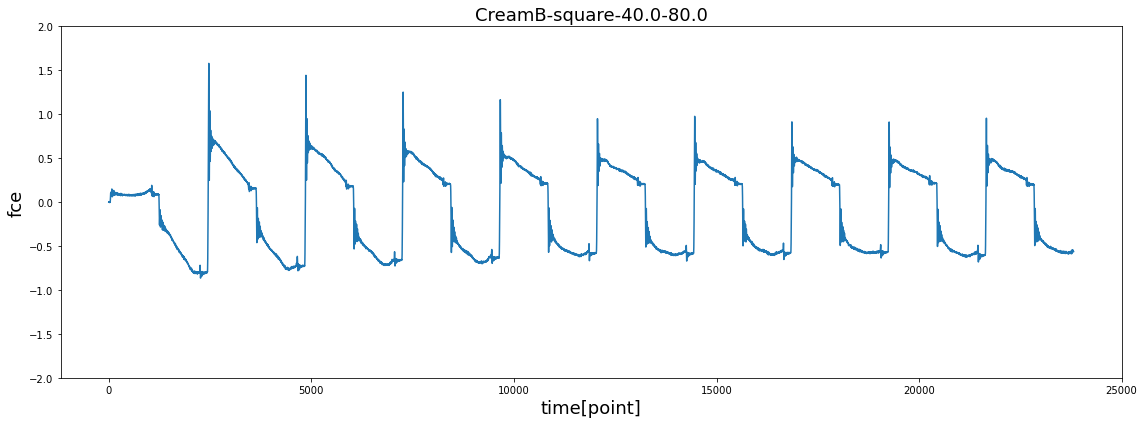

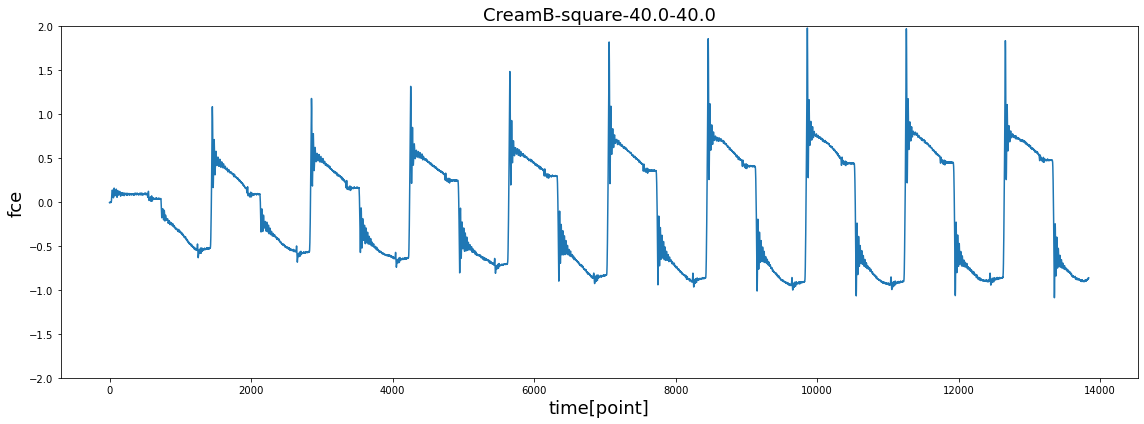

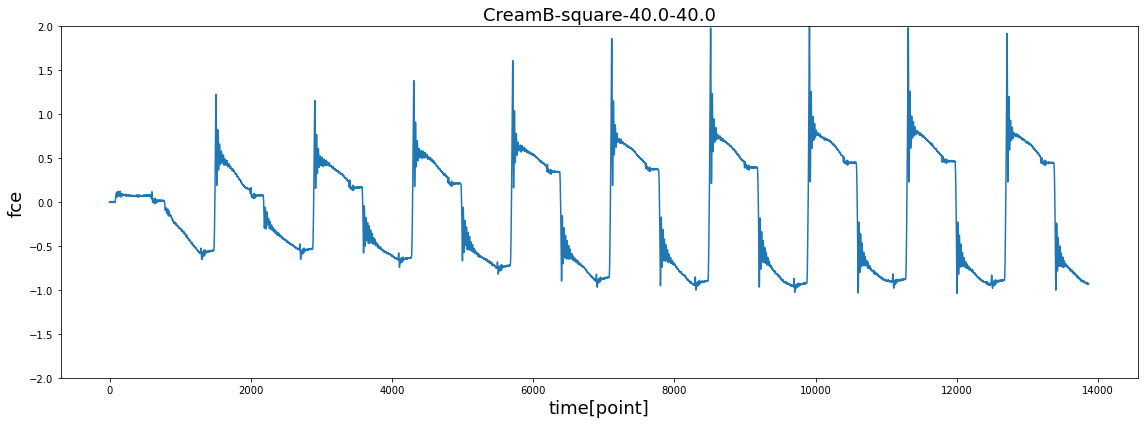

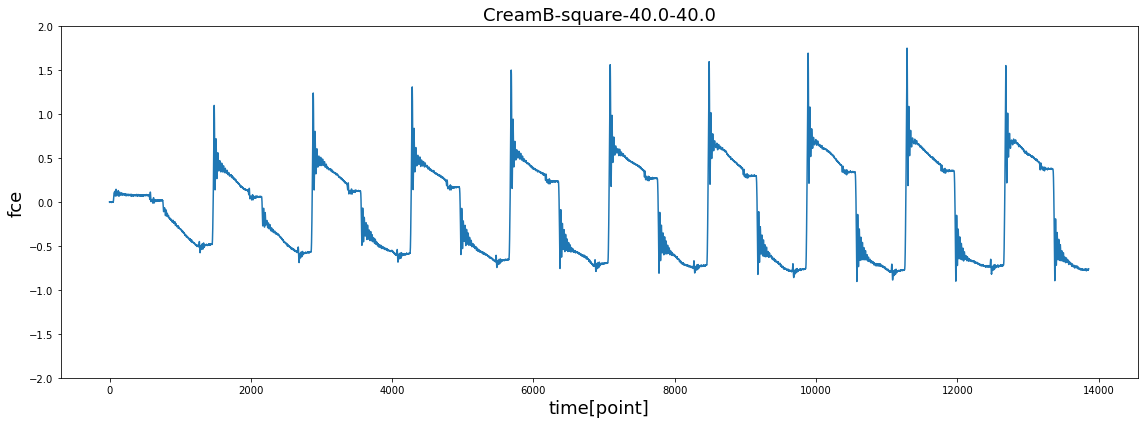

In [5]:
for i in v_data_conditions.index:
    if v_frictionData[str(i)].type == 'sin':
        v_range_fce = 0.2
    elif v_frictionData[str(i)].type == 'square':
        v_range_fce = 2.0
    v_frictionData[str(i)].plot_rawData(v_range_fce)

## 時系列データの概要

In [6]:
v_summary_data = pd.DataFrame(index=v_data_conditions.index, columns=['points', 'mean', 'std', 'max', 'min'])
for i in v_data_conditions.index:
    v_summary_data.loc[str(i), 'points'] = v_frictionData[str(i)].data['fce'].count()
    v_summary_data.loc[str(i), 'mean'] = v_frictionData[str(i)].data['fce'].mean()
    v_summary_data.loc[str(i), 'std'] = v_frictionData[str(i)].data['fce'].std()
    v_summary_data.loc[str(i), 'max'] = v_frictionData[str(i)].data['fce'].max()
    v_summary_data.loc[str(i), 'min'] = v_frictionData[str(i)].data['fce'].min()
print(v_summary_data)

           points        mean        std        max       min
data                                                         
201218_01  400072 -0.00606973  0.0552367   0.124512 -0.152893
201218_02   40156 -0.00551284   0.043075   0.161438   -0.1474
201218_03   10135 -0.00828428  0.0659432   0.188904 -0.132446
201218_04  400078 -0.00700731  0.0852339   0.171204 -0.187073
201218_05   40133 -0.00421805  0.0805798   0.136108 -0.180359
201218_06   10115 -0.00608599  0.0613794  0.0939941 -0.108643
210114_01  403712  -0.0486877   0.481946    1.24115  -1.08368
210114_02  403704  -0.0553628    0.40541    1.17859  -1.06659
210114_03  403728  -0.0370281   0.185384   0.480347 -0.414734
210114_04   43825  -0.0274802   0.371645    1.49017 -0.679626
210114_05   43865  -0.0331307   0.347213     1.4032 -0.725098
210114_06   43853  -0.0433918   0.430453     1.5918 -0.733032
210114_07   23816   -0.122984   0.508749    2.24487  -1.02722
210114_08   23815  -0.0991058   0.519338    2.24091   -1.0141
210114_0

## Trend x Period x Residualに分解

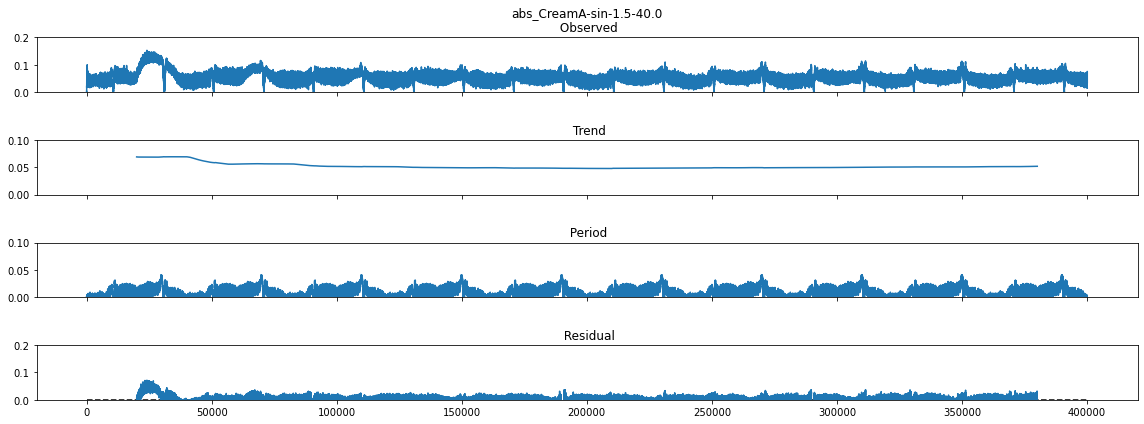

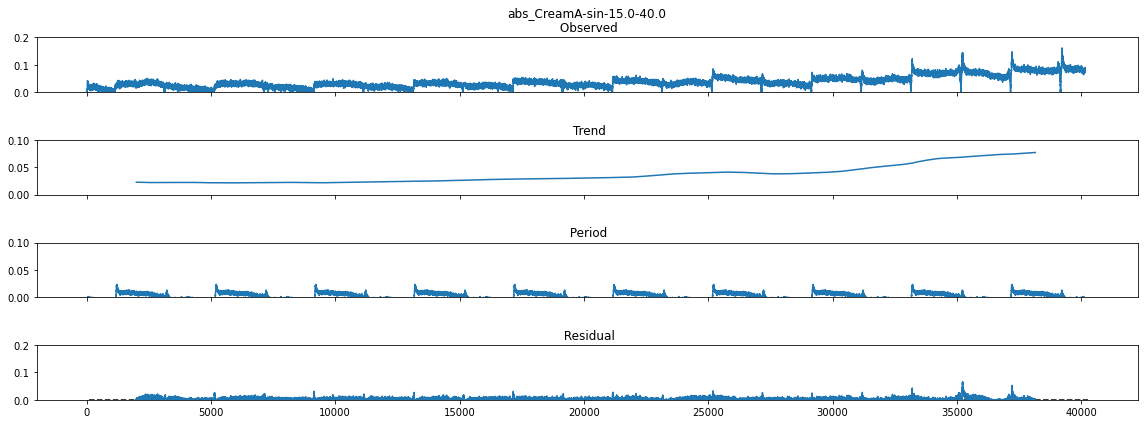

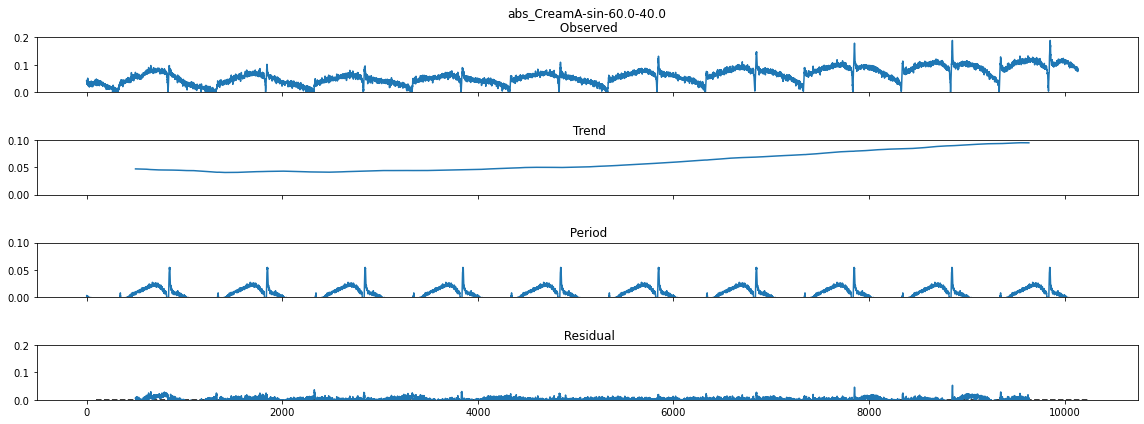

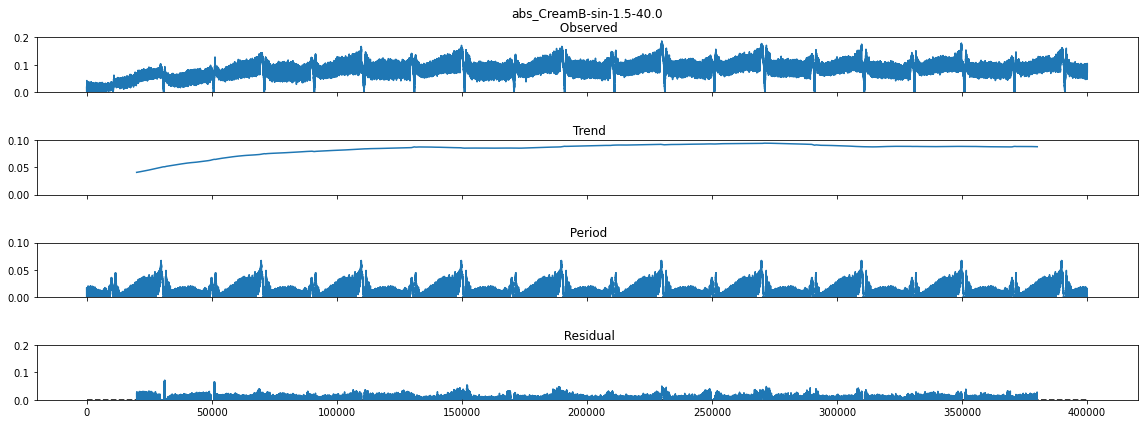

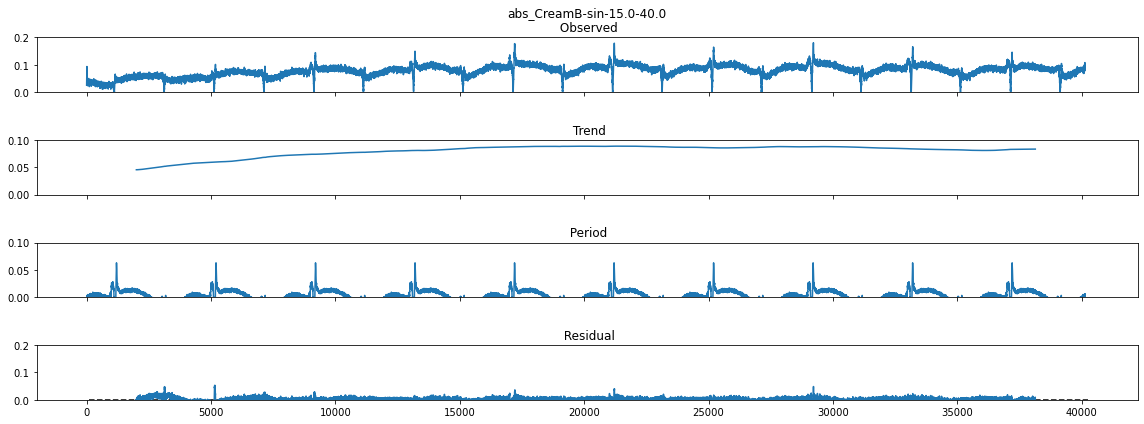

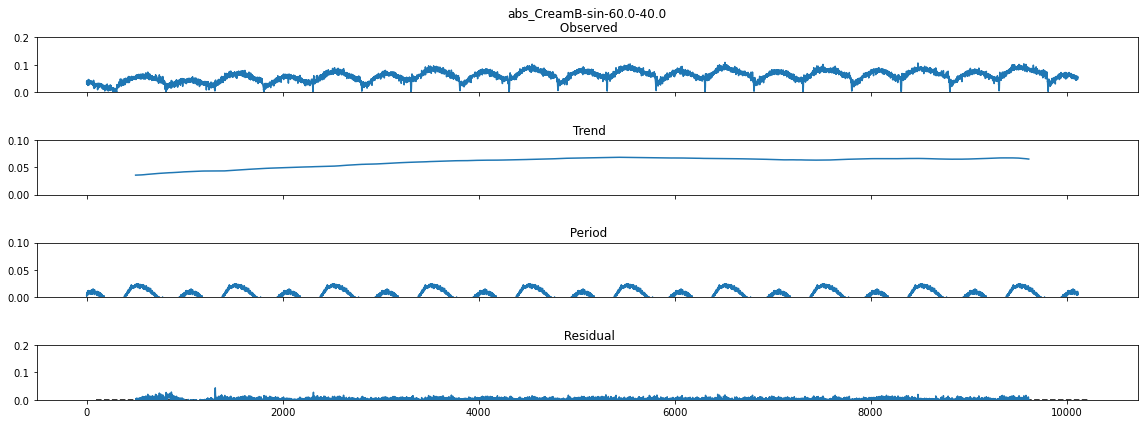

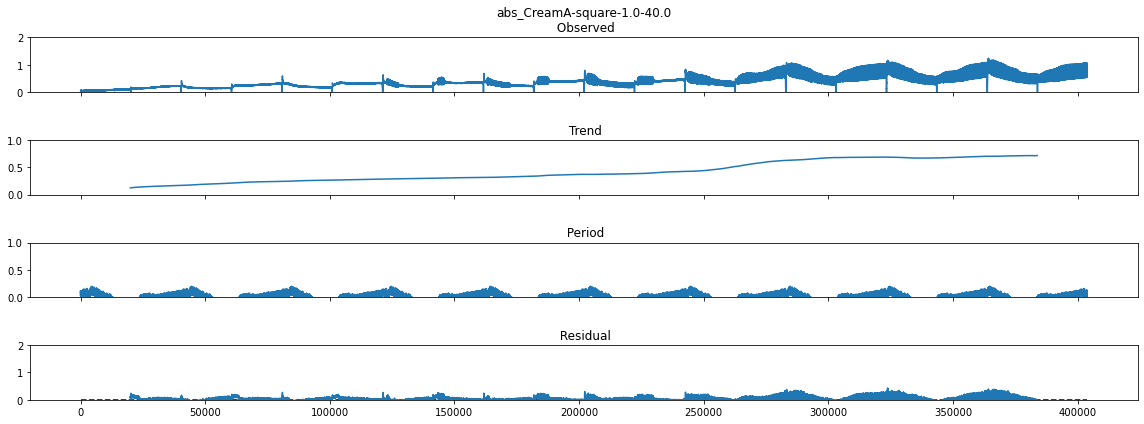

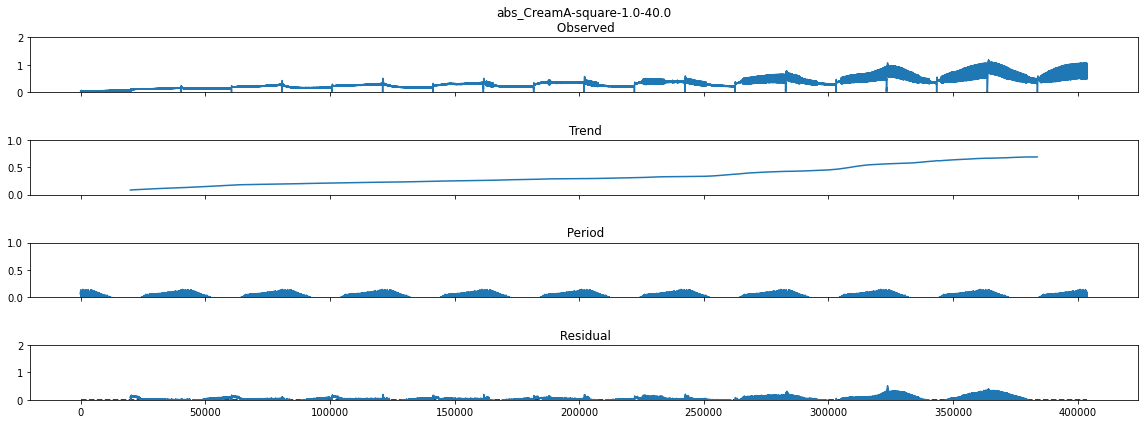

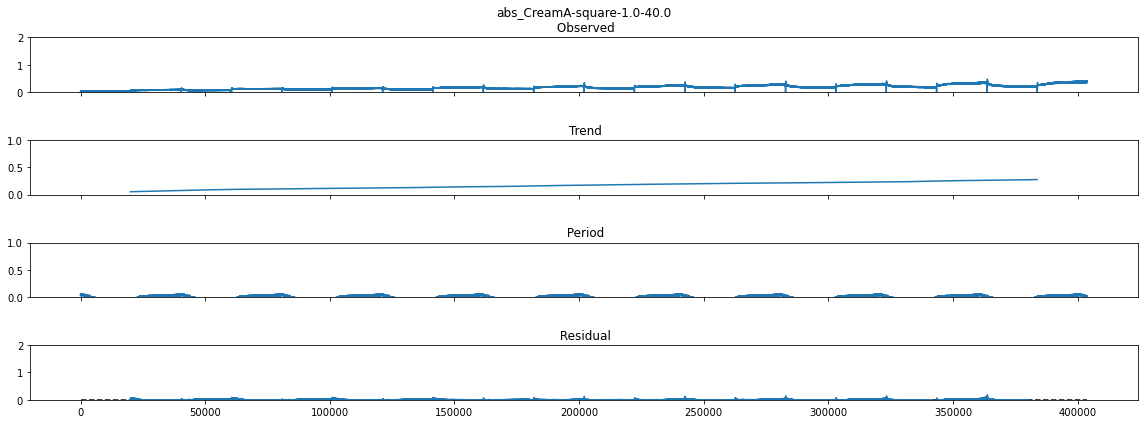

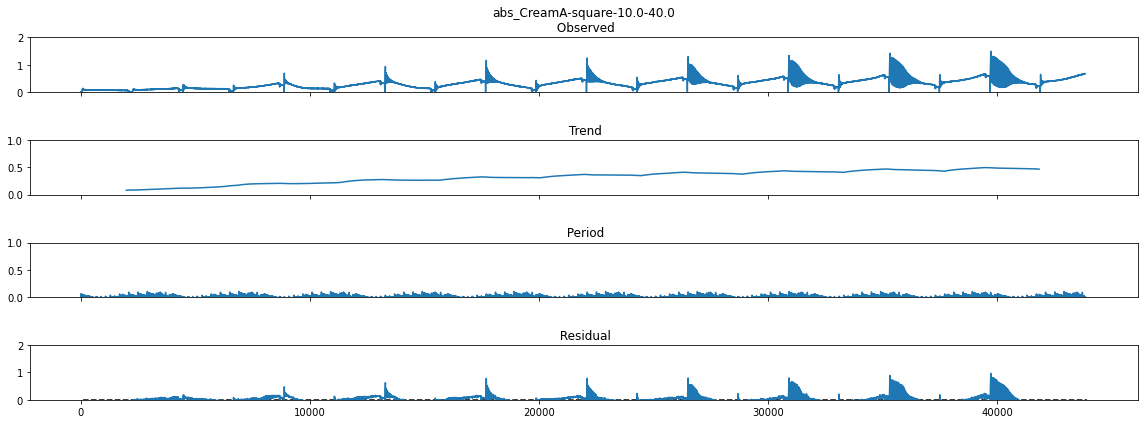

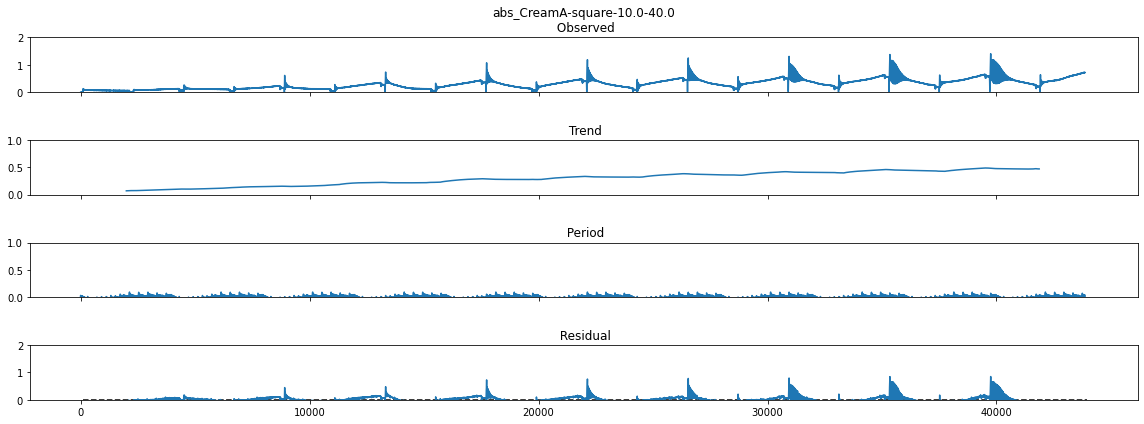

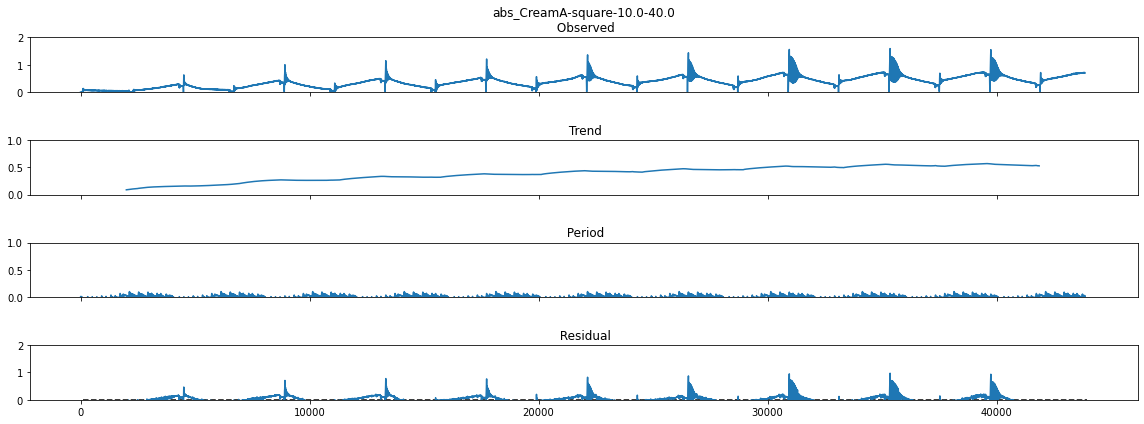

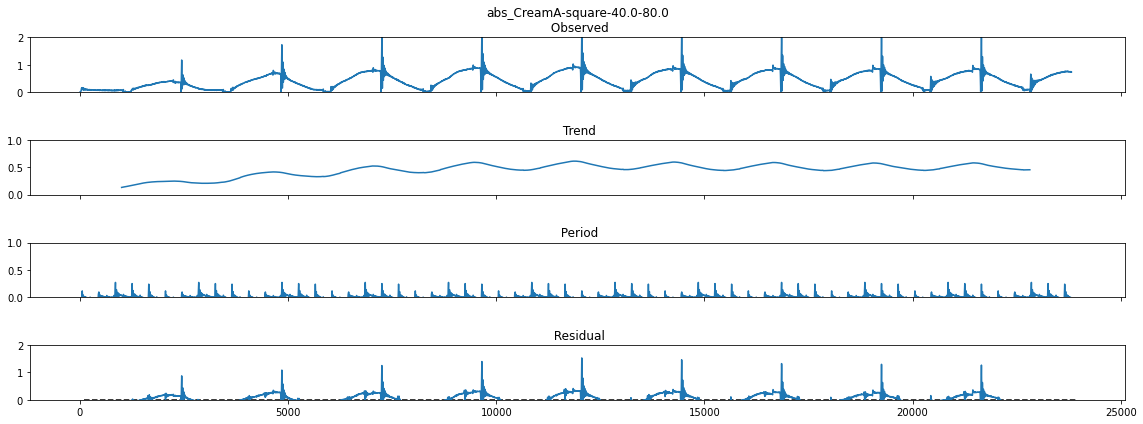

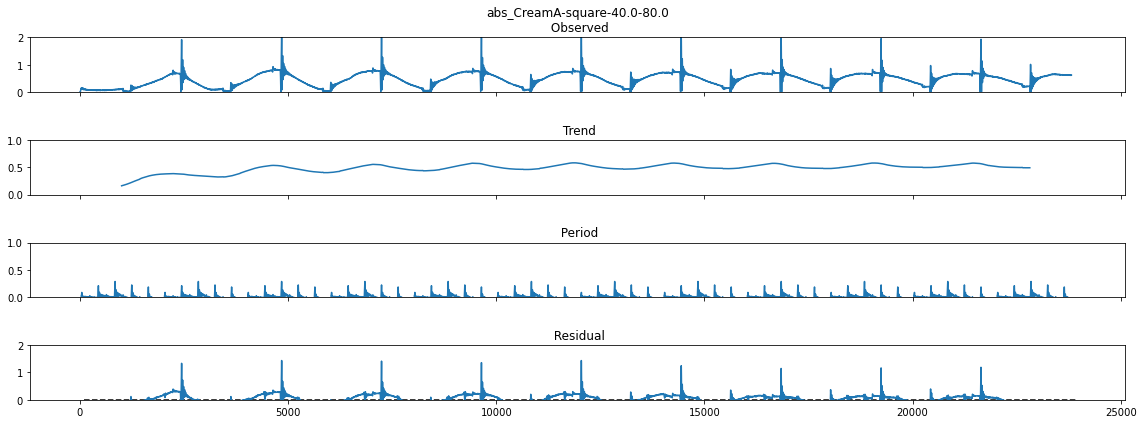

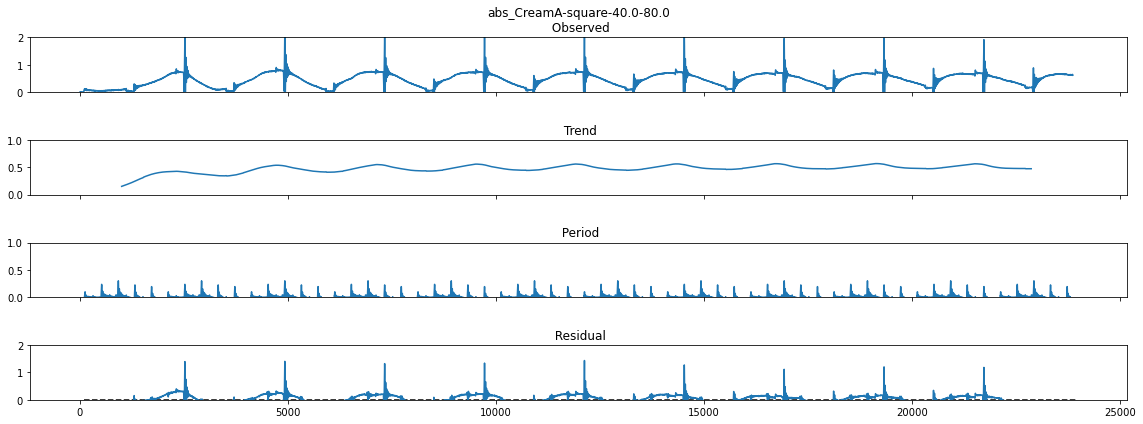

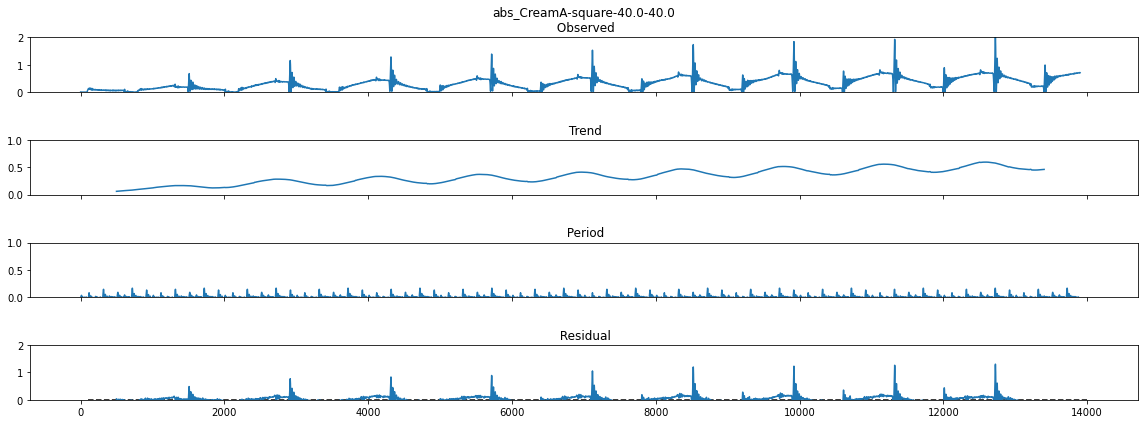

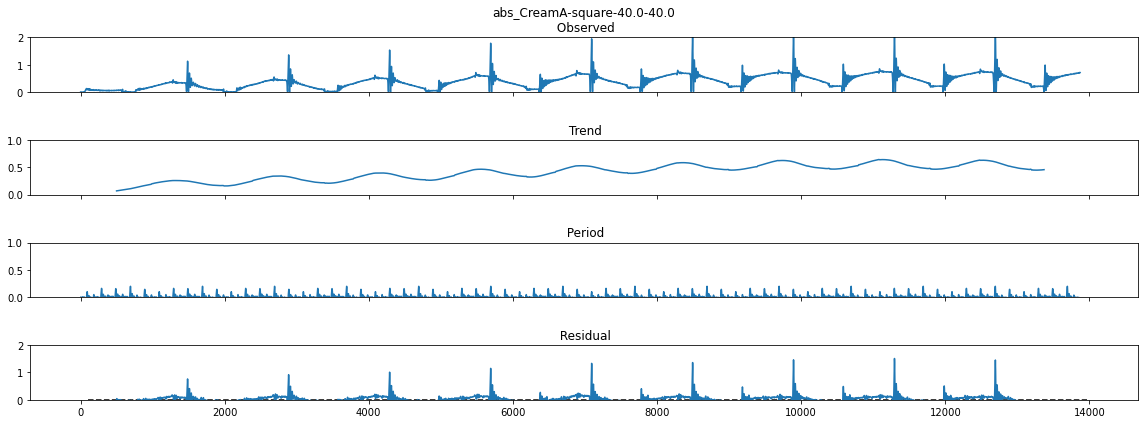

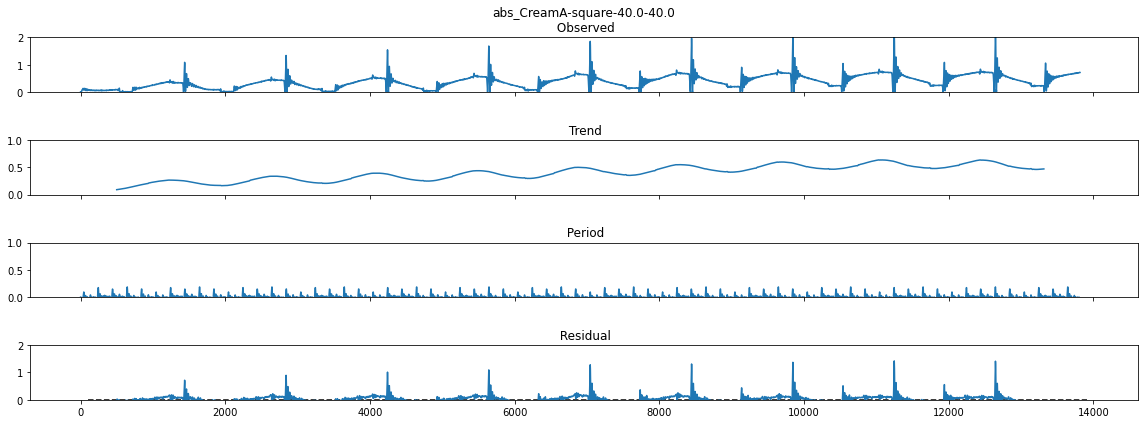

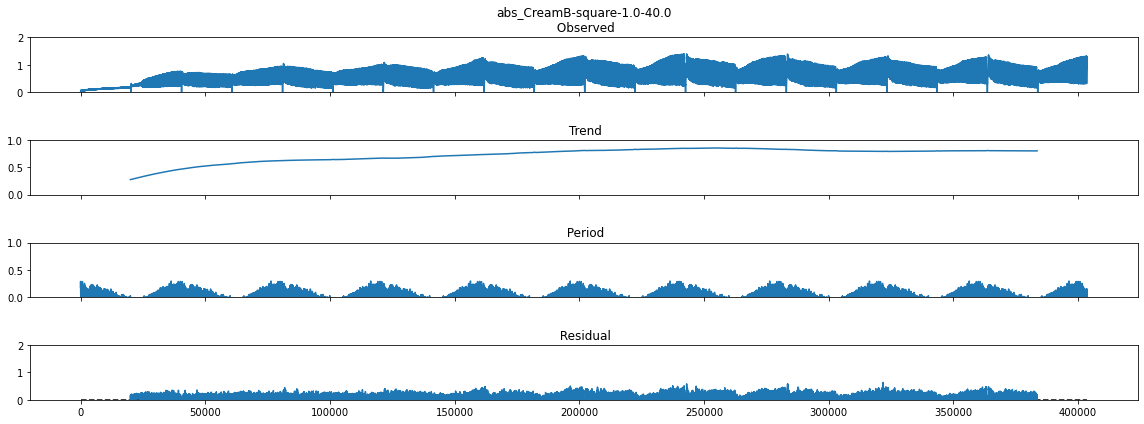

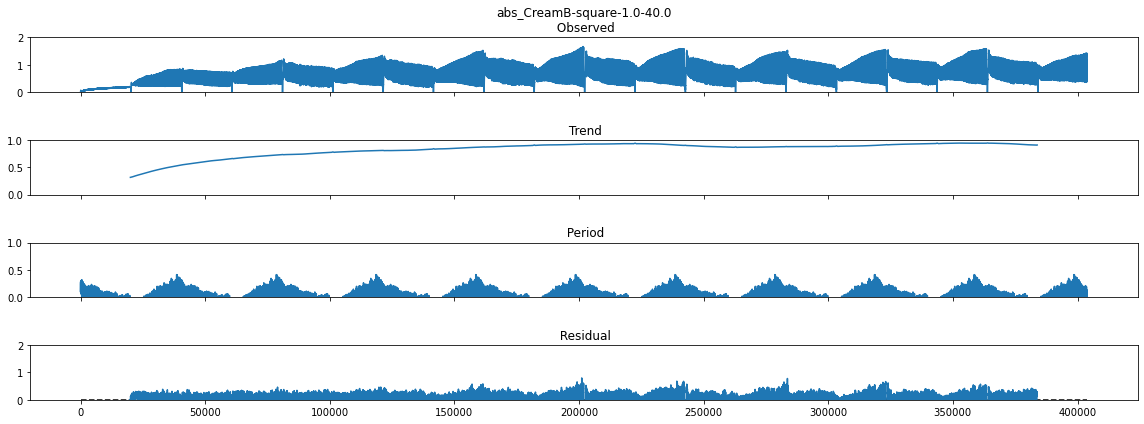

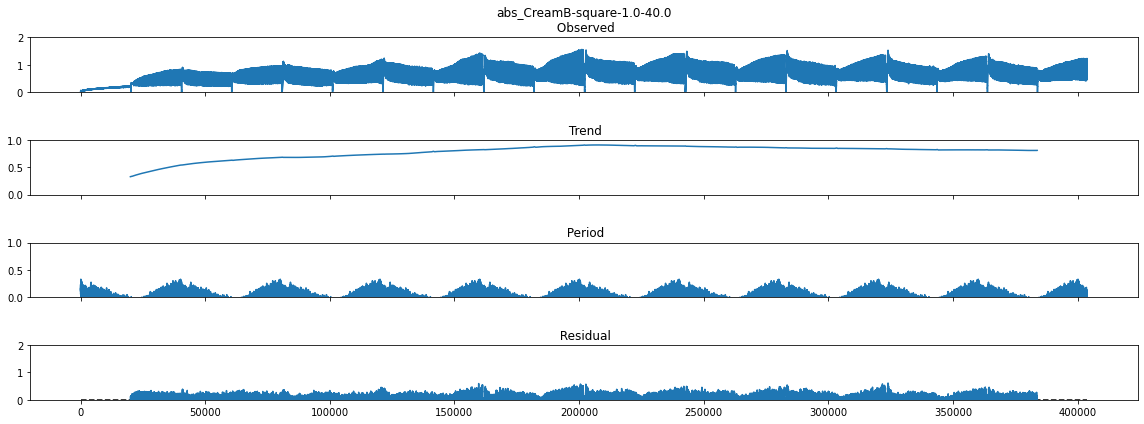

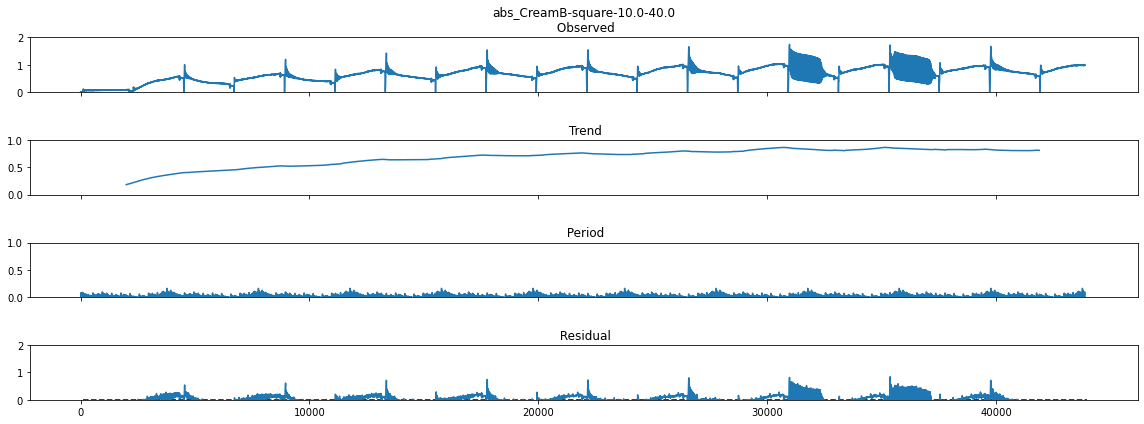

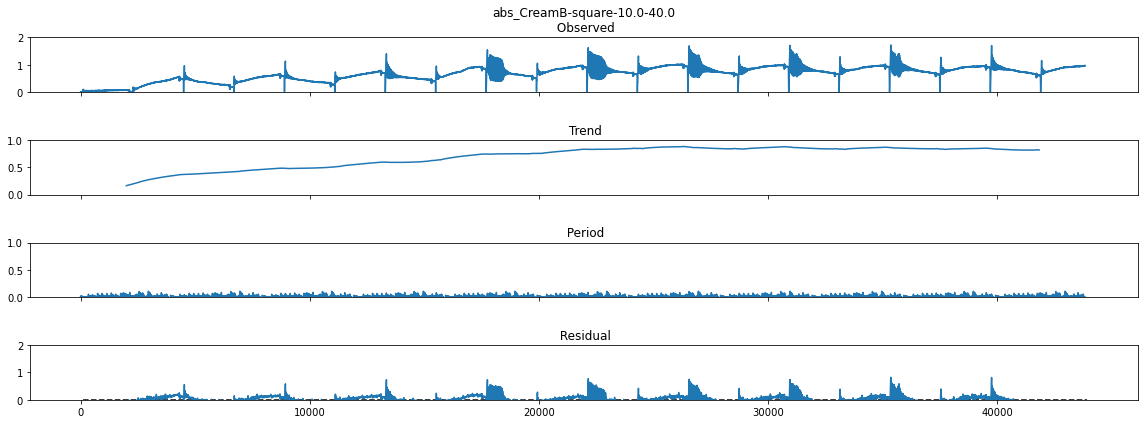

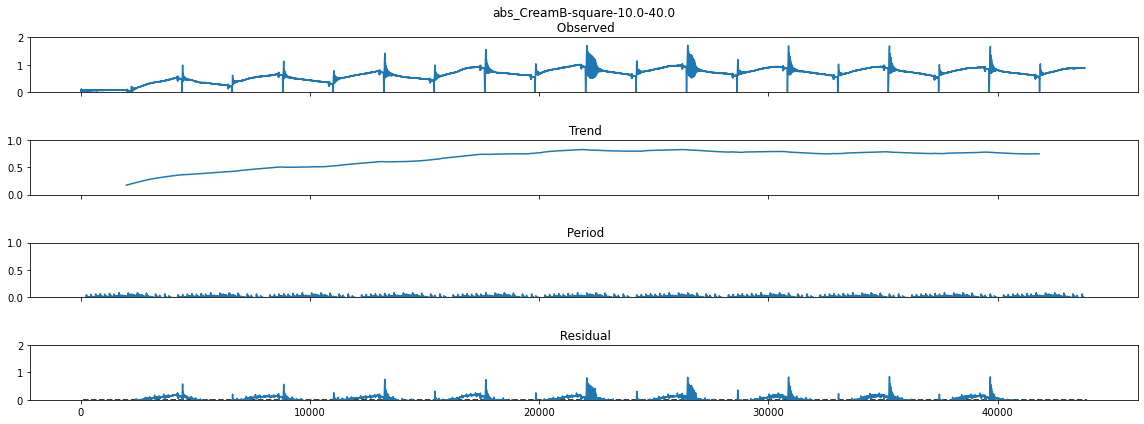

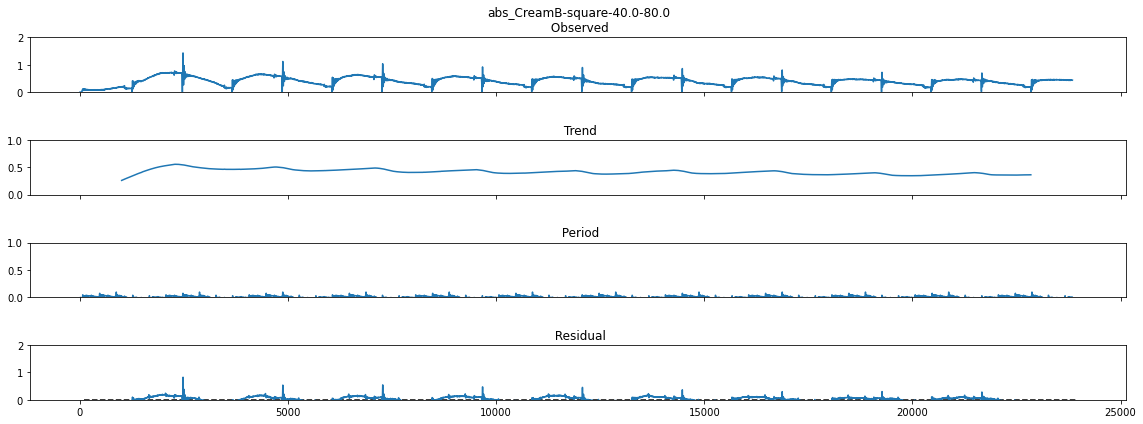

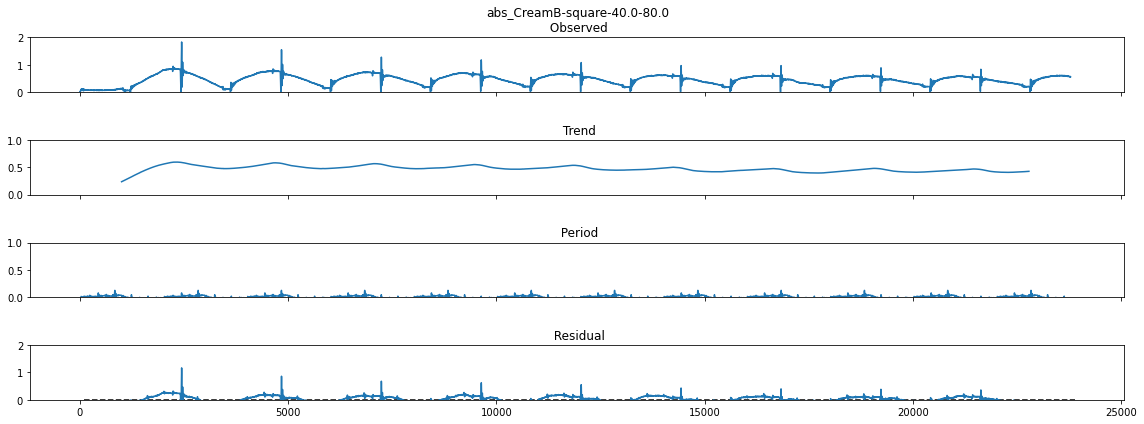

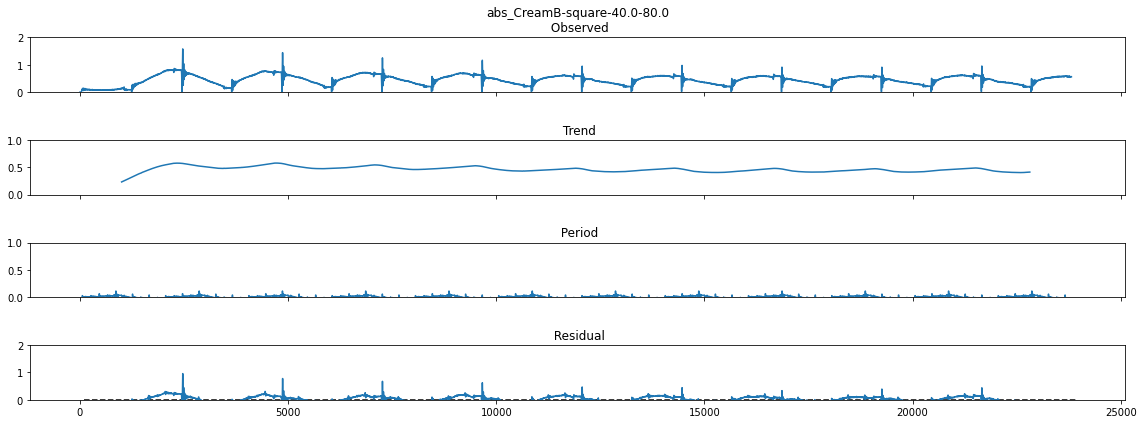

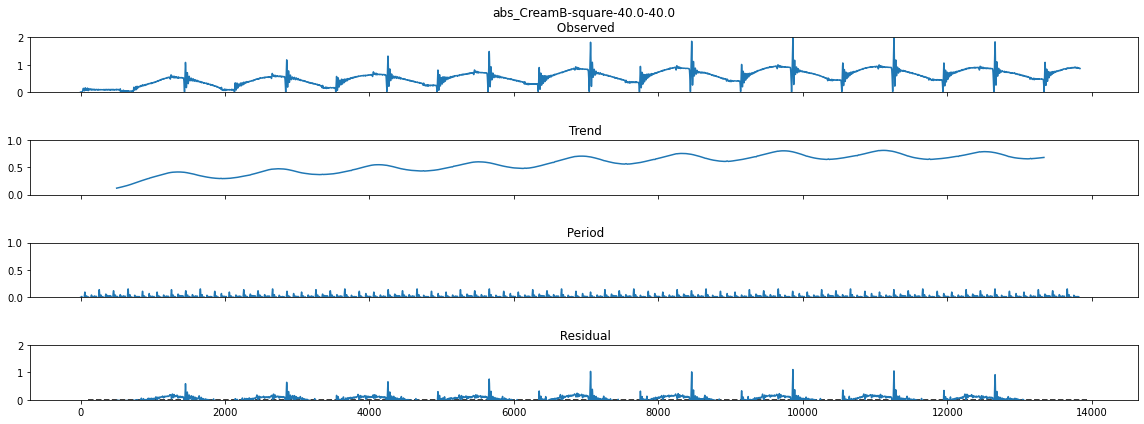

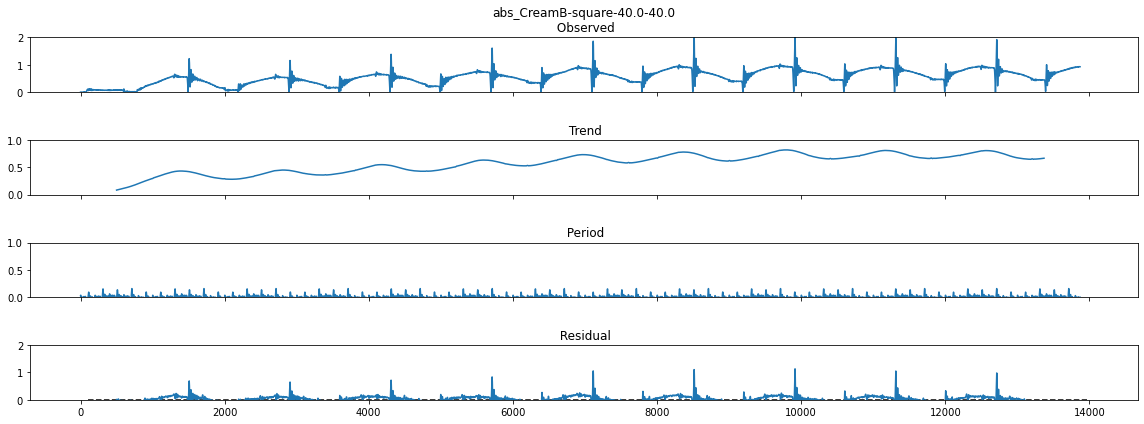

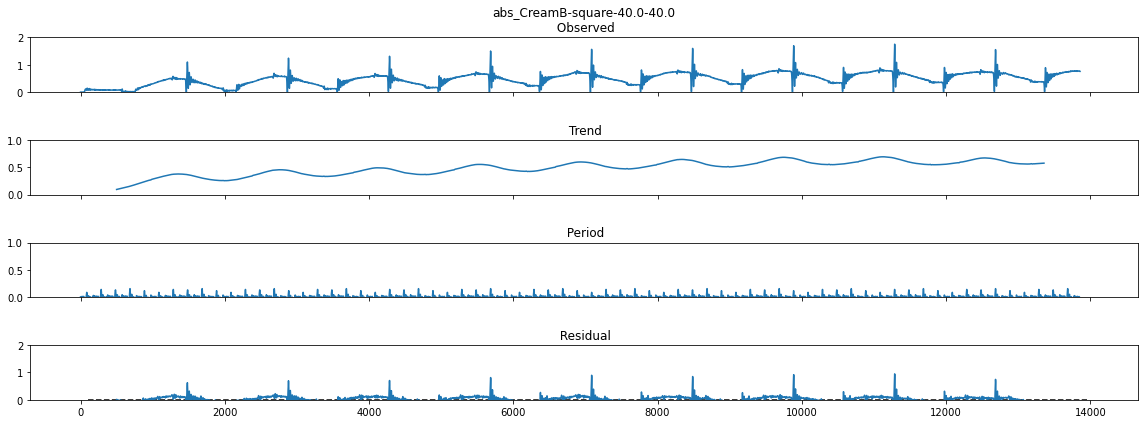

In [7]:
for i in v_data_conditions.index:
    if v_frictionData[str(i)].type == 'sin':
        v_range_dcp = [0.2, 0.1, 0.1, 0.2]
    elif v_frictionData[str(i)].type == 'square':
        v_range_dcp = [2.0, 1.0, 1.0, 2.0]
    v_frictionData[str(i)].decompose_abs(v_range_dcp)

## 速度 VS 摩擦係数

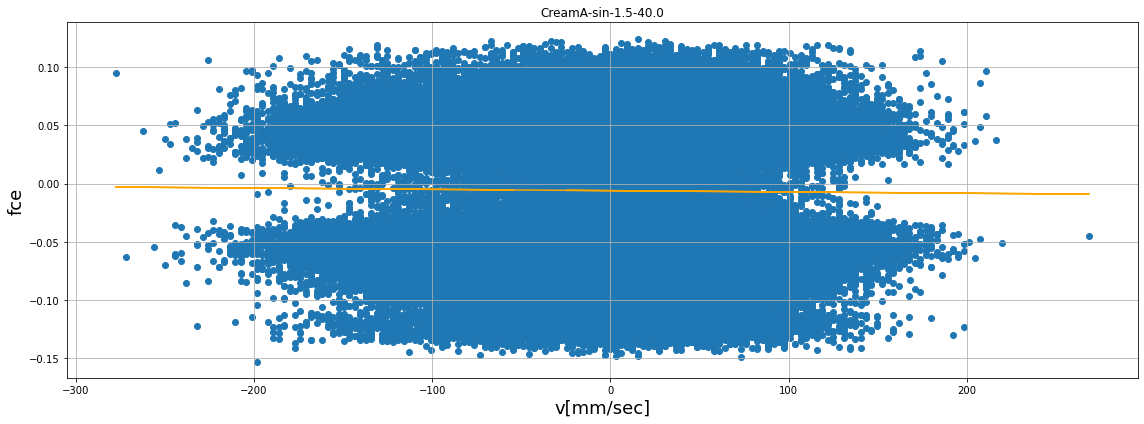

-0.011601090795835798


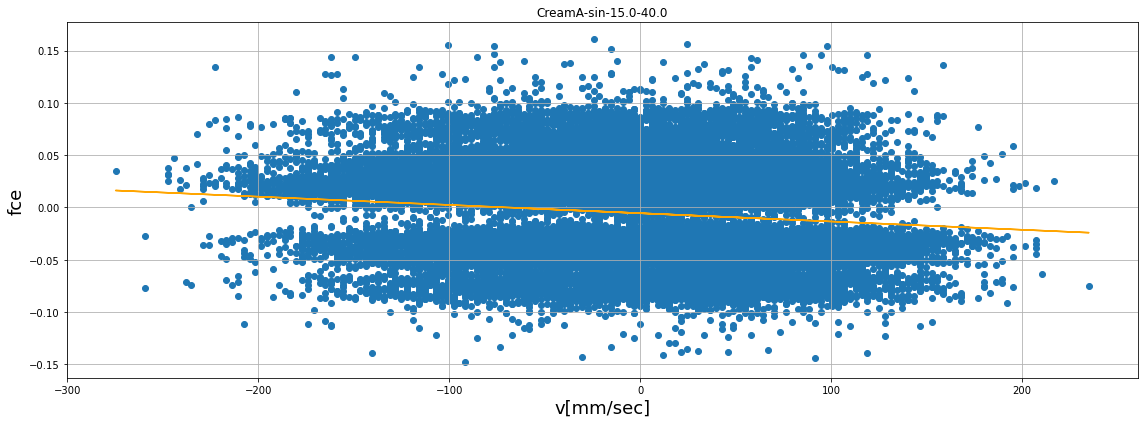

-0.12546445562047717


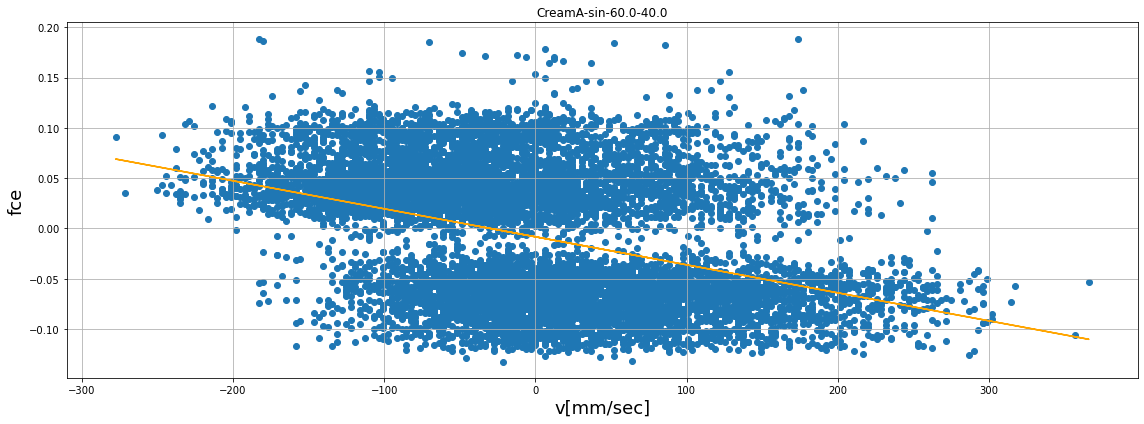

-0.39640791040083506


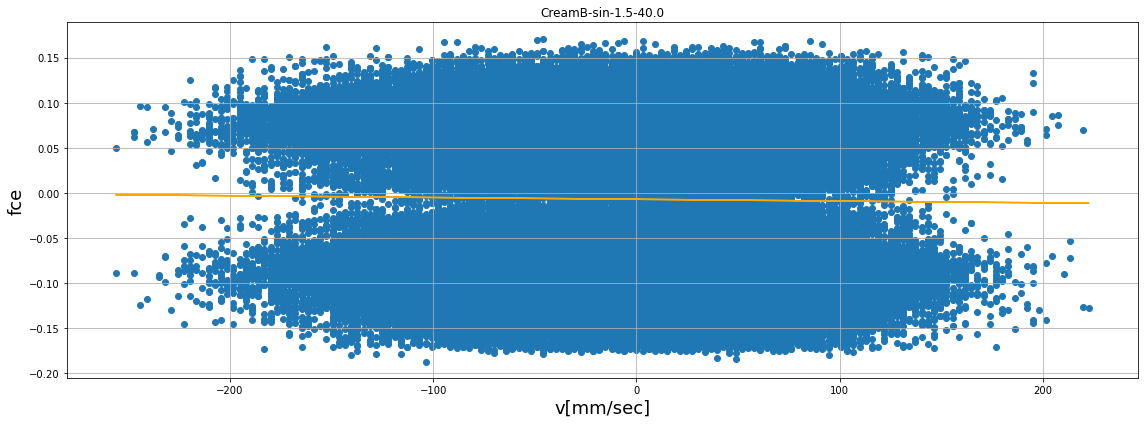

-0.01317840955814643


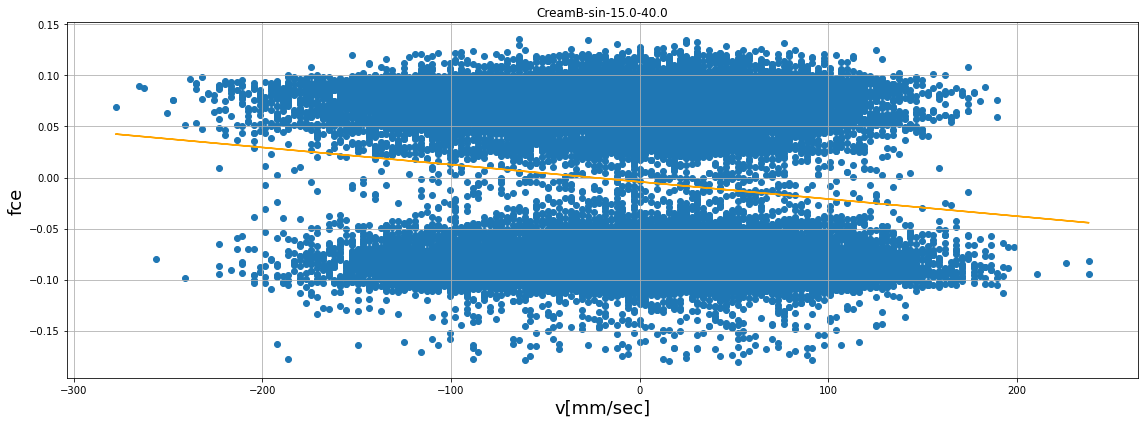

-0.14149835299862296


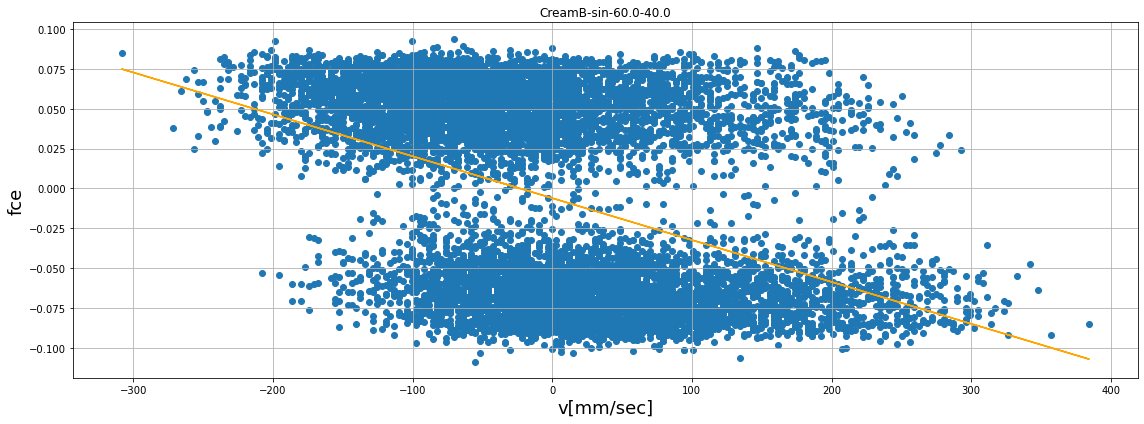

-0.42073598758045033


In [8]:
for i in v_data_conditions.index:
    if v_frictionData[str(i)].type == 'sin':
        v_frictionData[str(i)].calc_v_vs_fce()
        print(v_frictionData[str(i)].data['v'].corr(v_frictionData[str(i)].data['fce']))

## 極値と位相ズレを確認

C:\Users\90033353\GoogleDrive_Nagi\Friction\frictionData.py:177: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


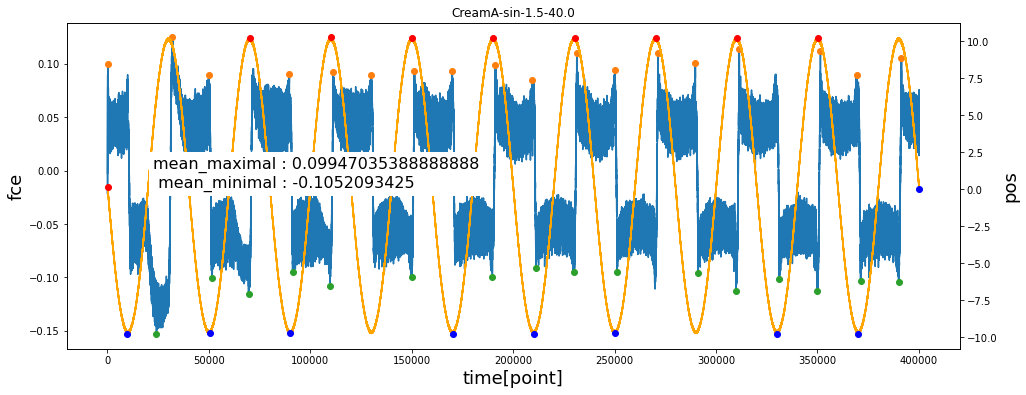

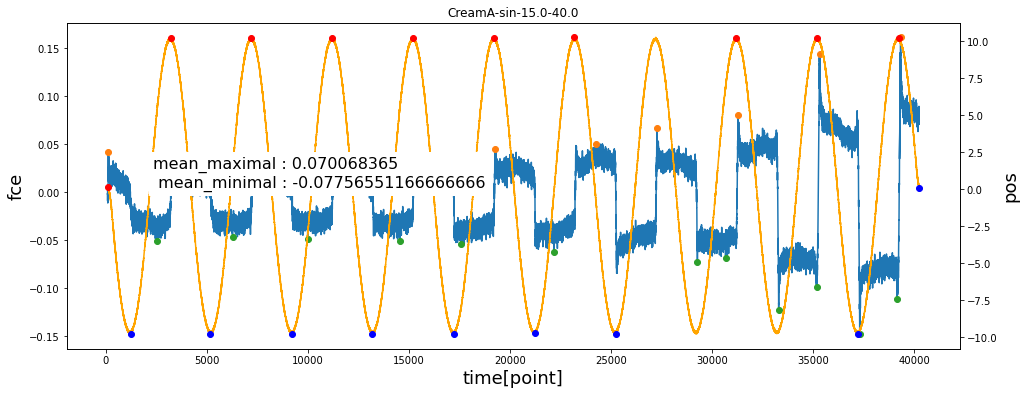

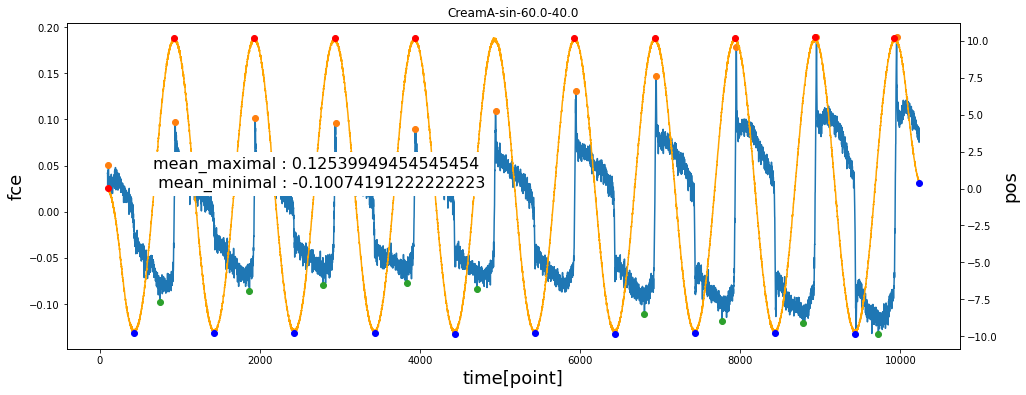

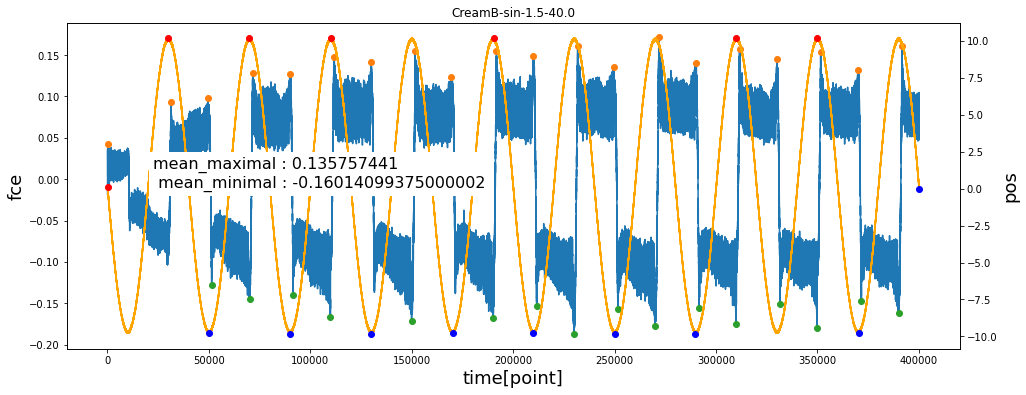

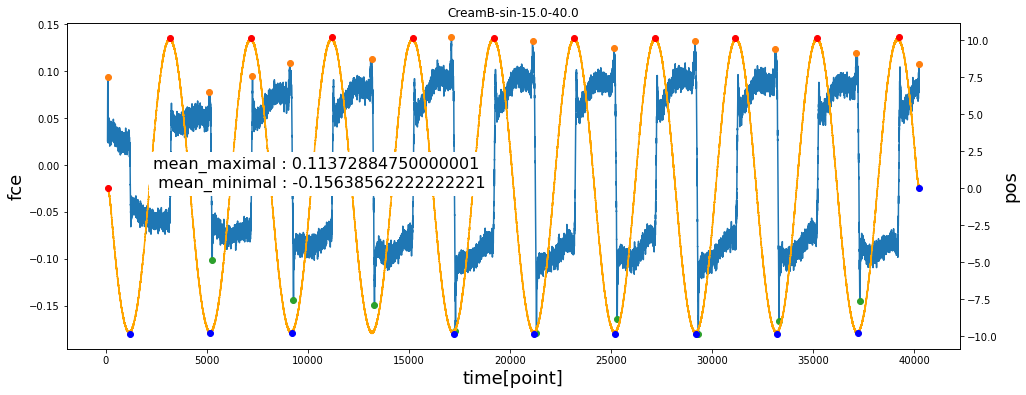

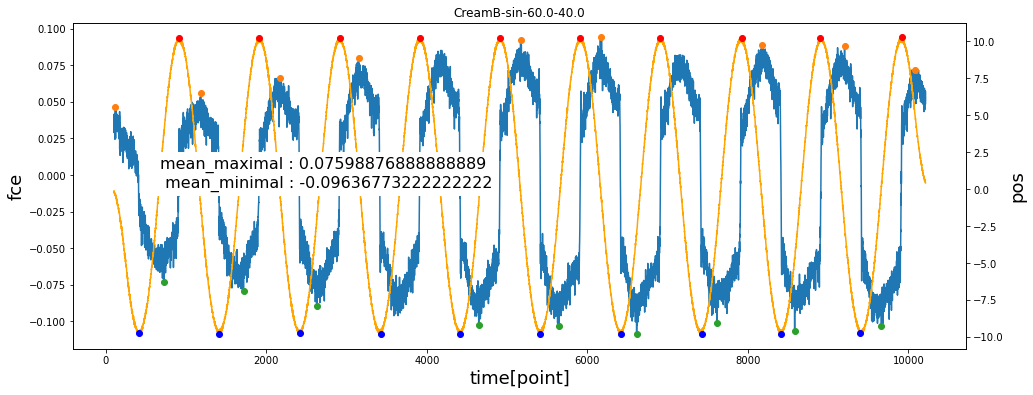

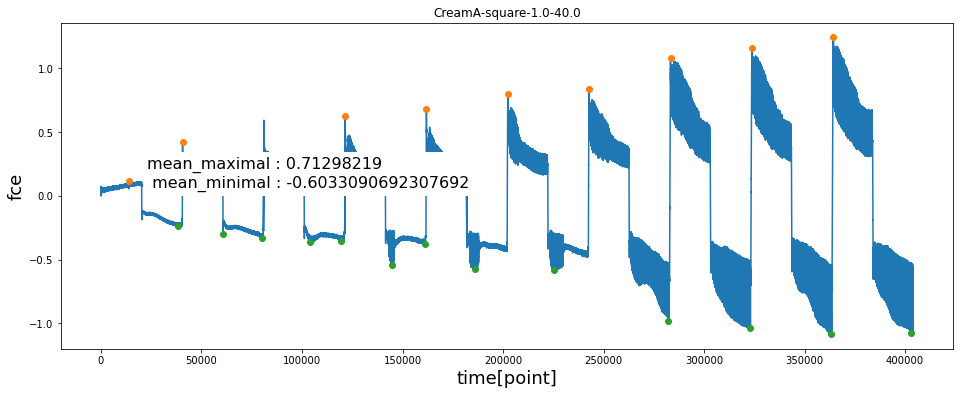

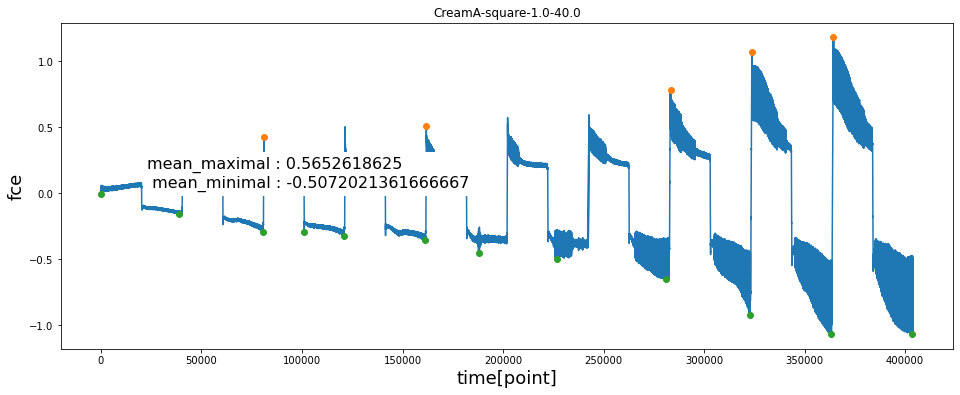

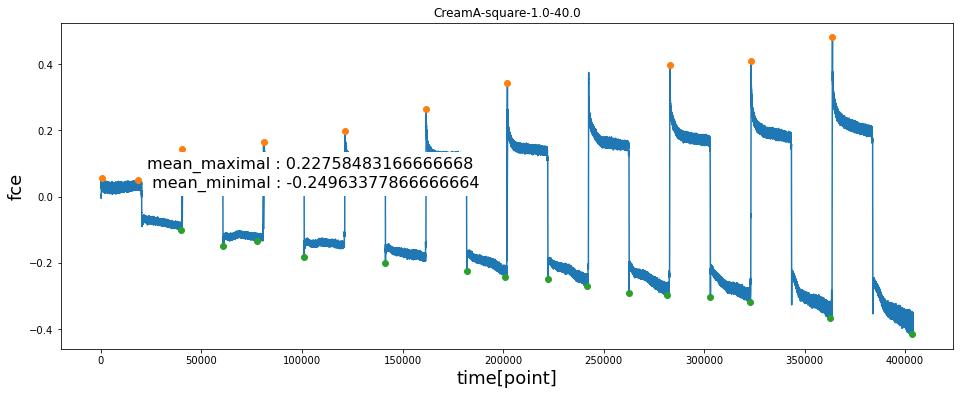

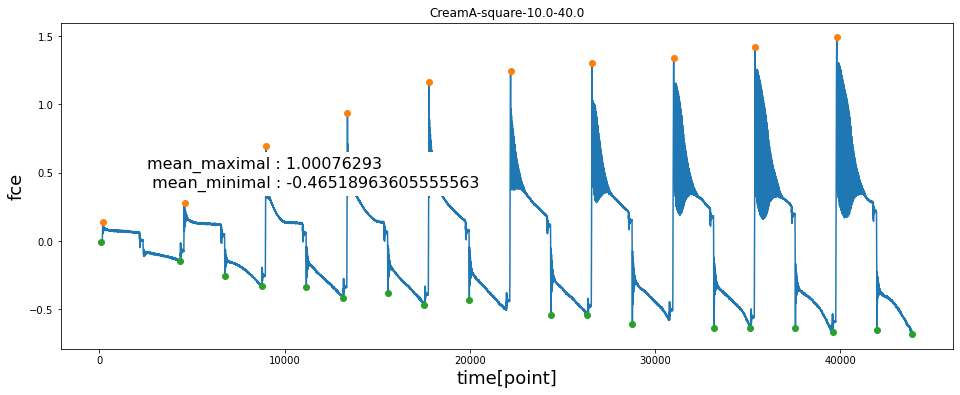

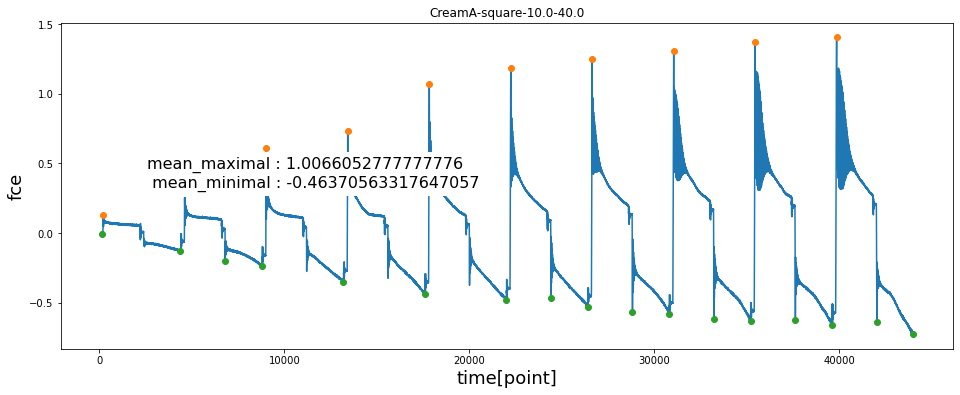

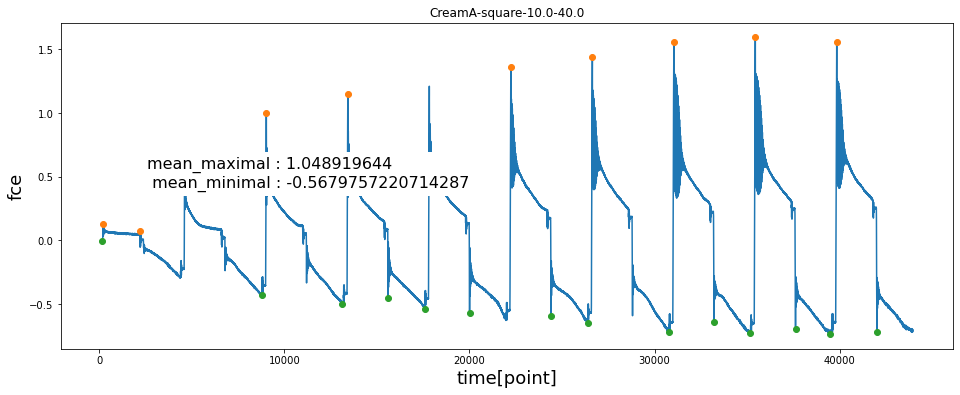

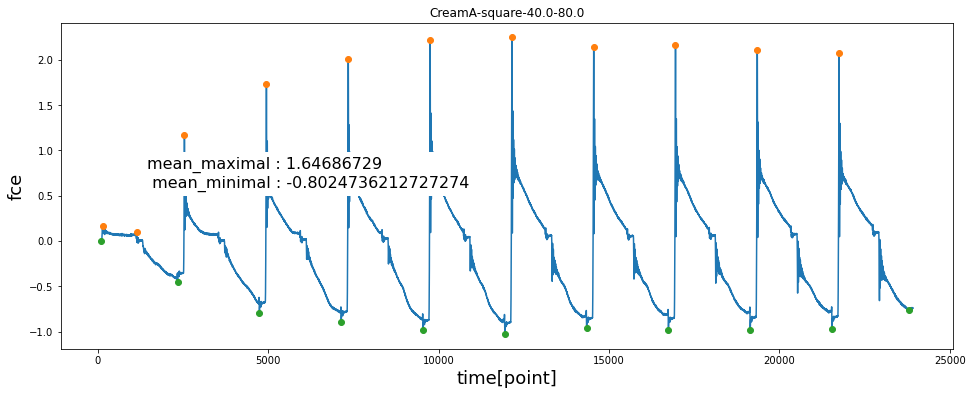

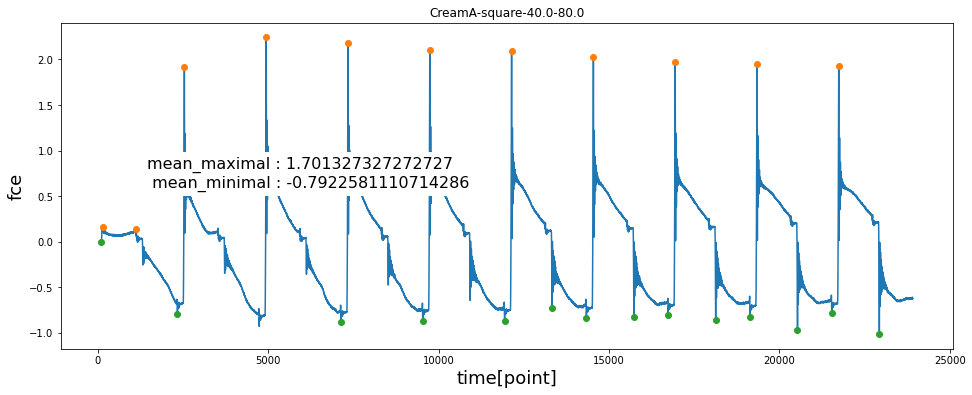

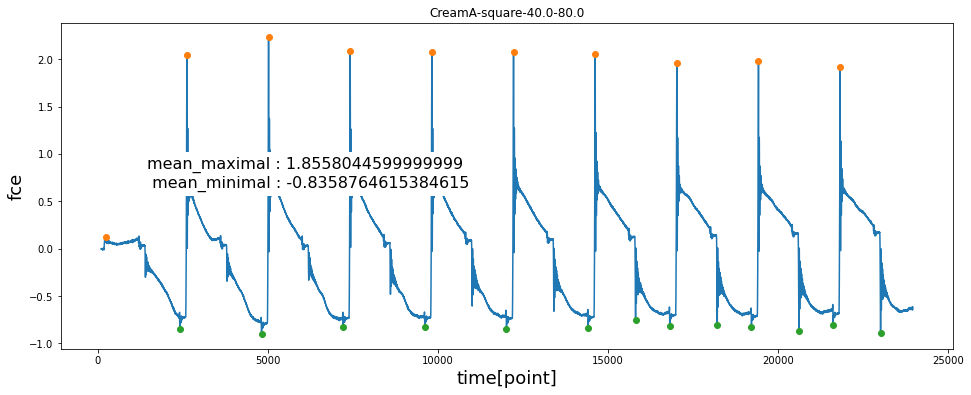

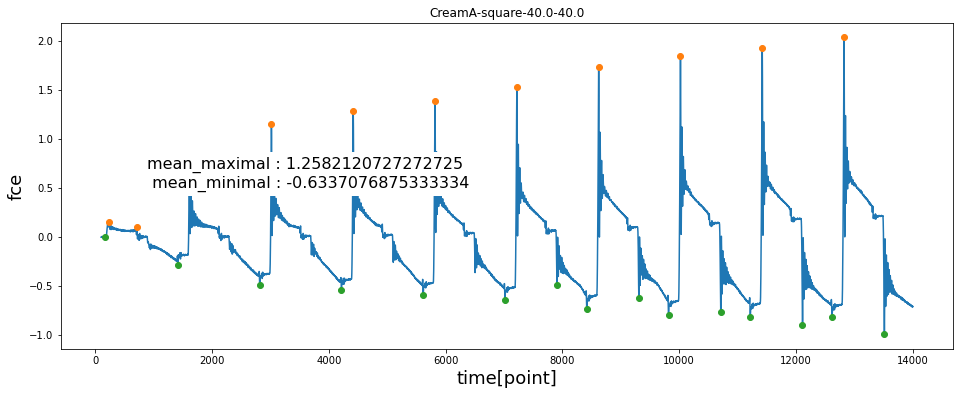

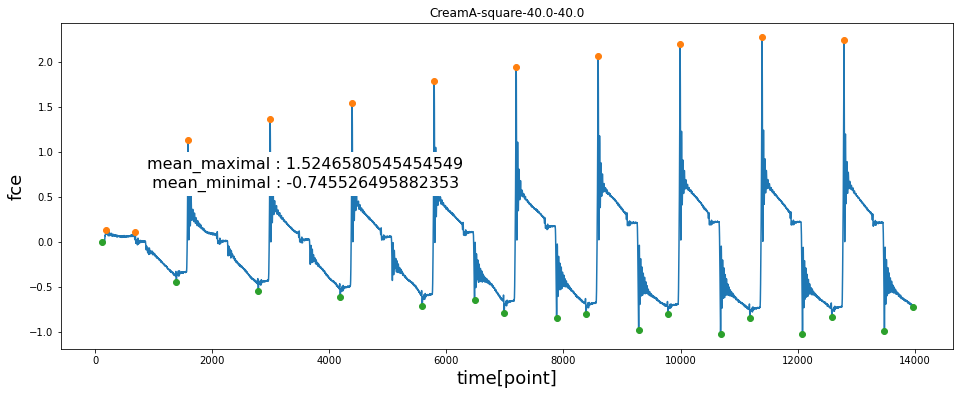

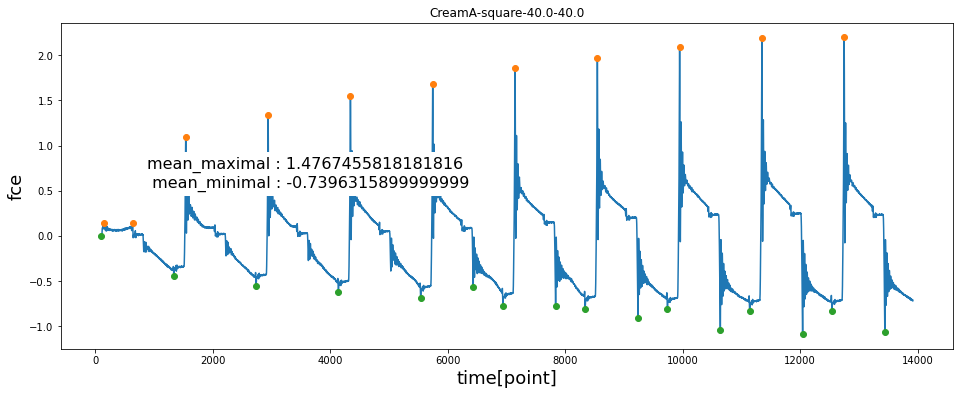

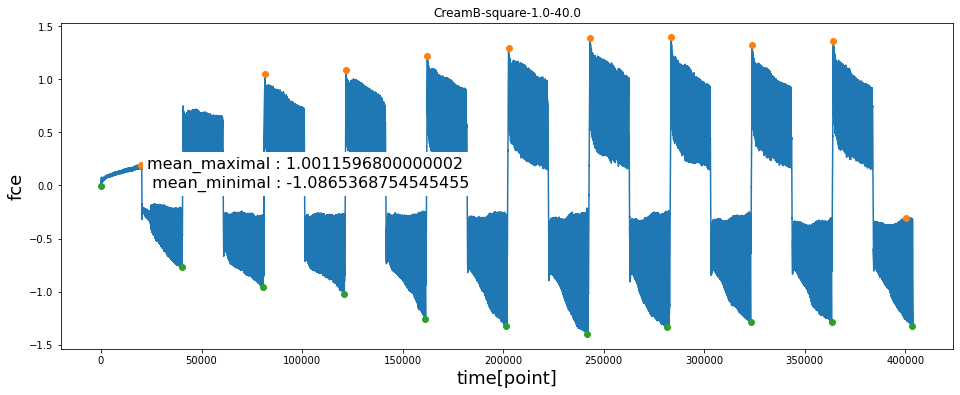

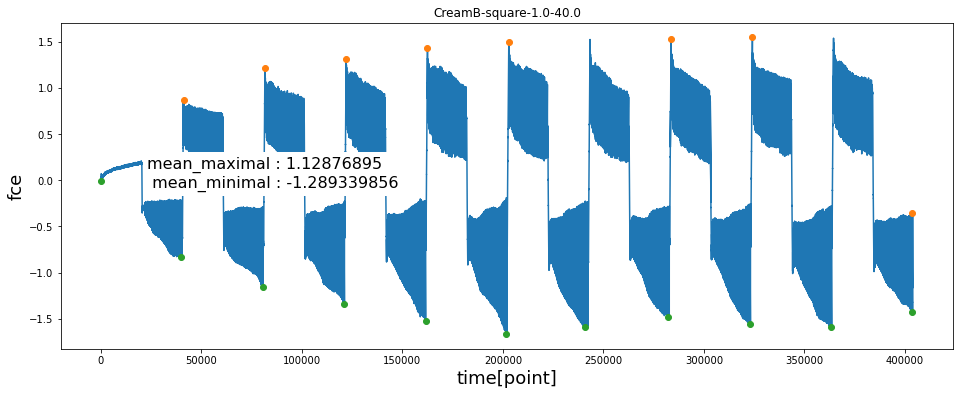

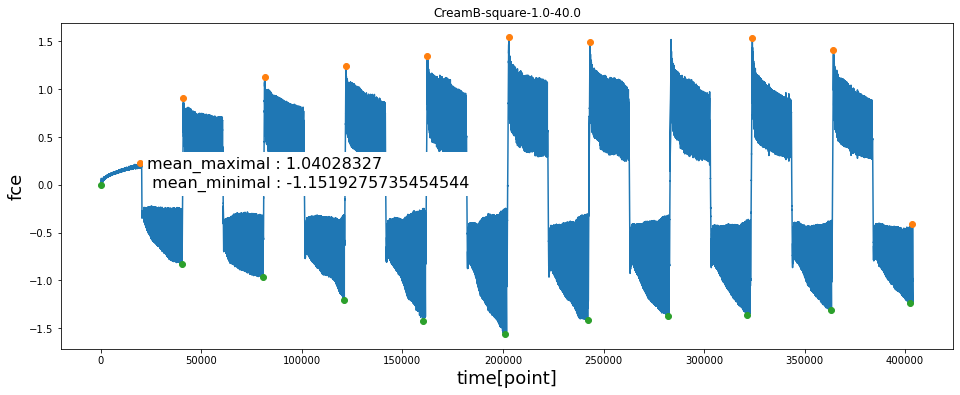

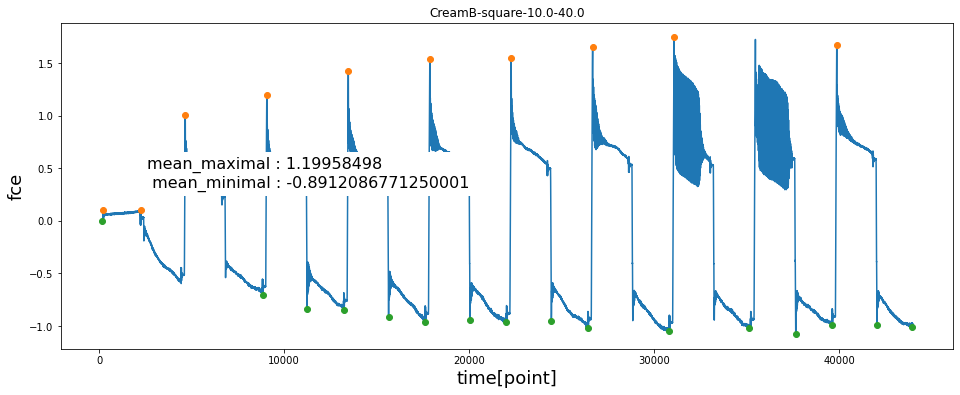

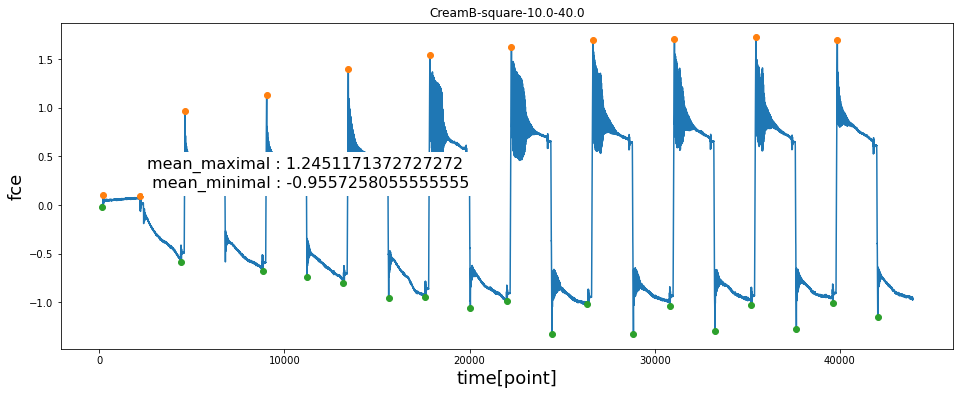

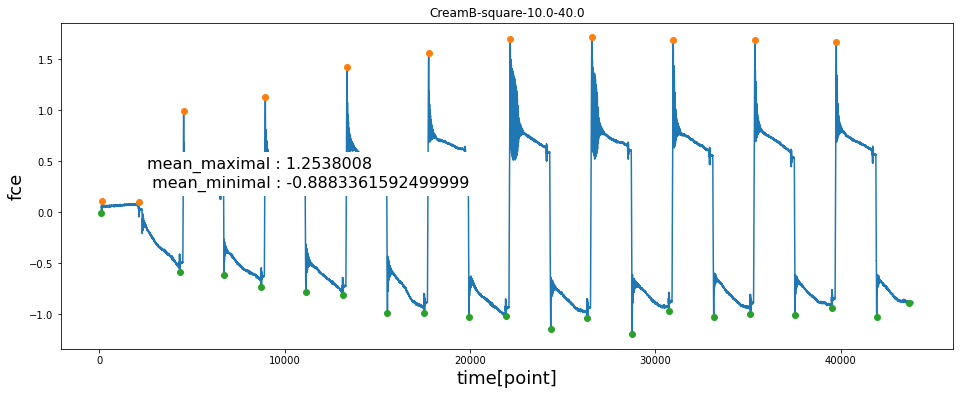

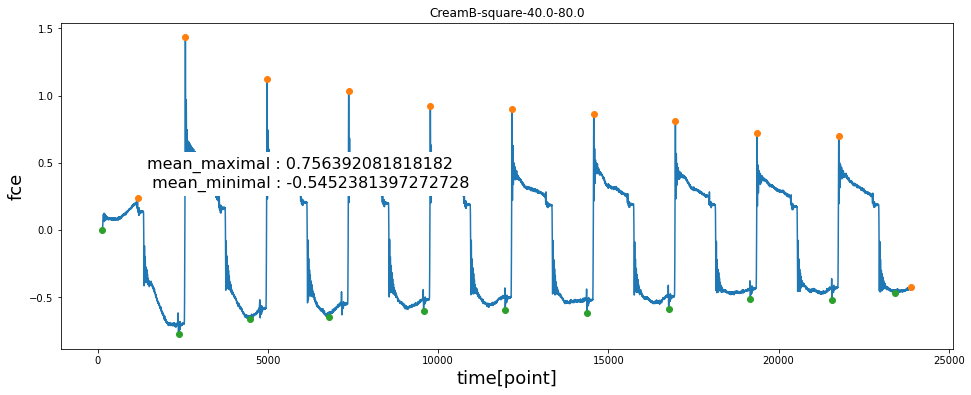

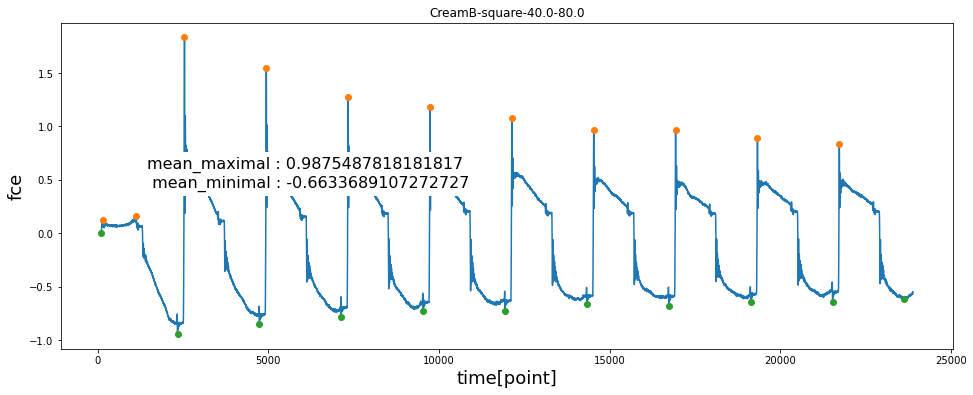

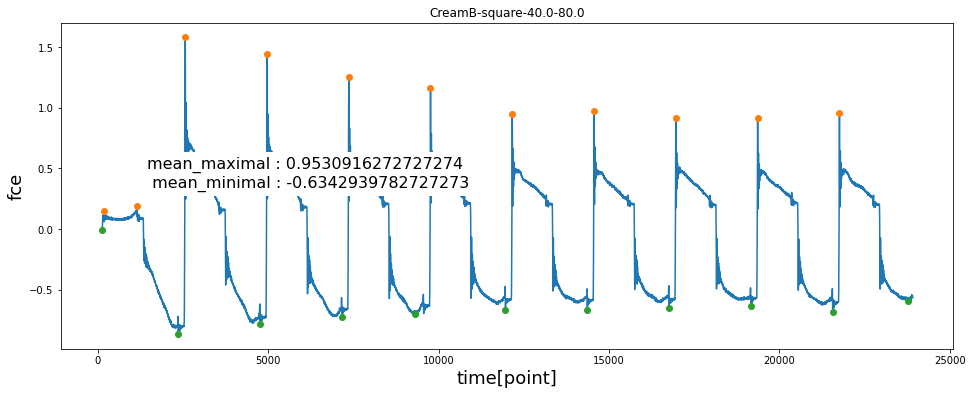

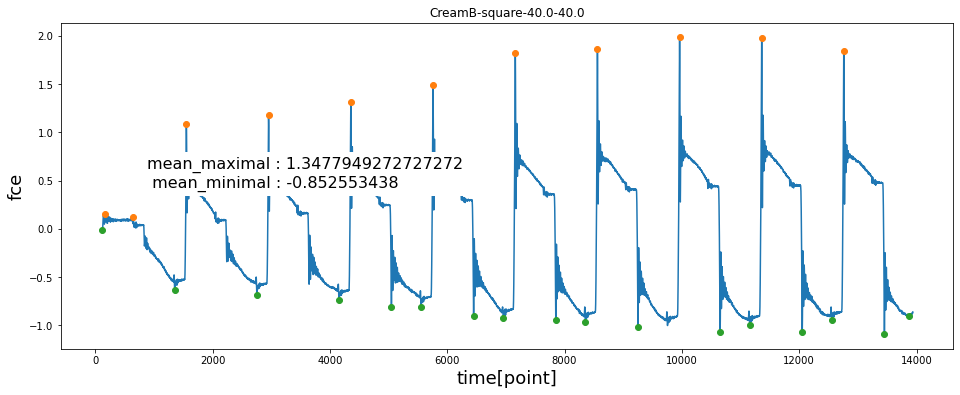

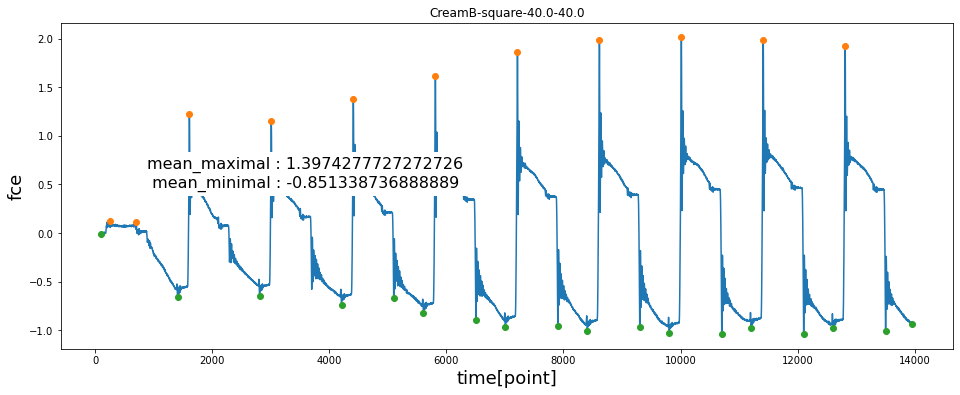

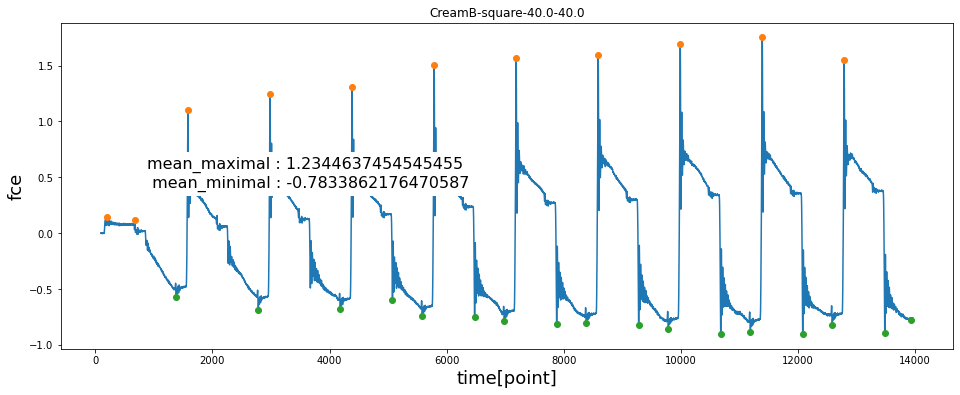

In [4]:
for i in v_data_conditions.index:
    v_frictionData[str(i)].compare_extremal()

## Try Dirichlet kernel

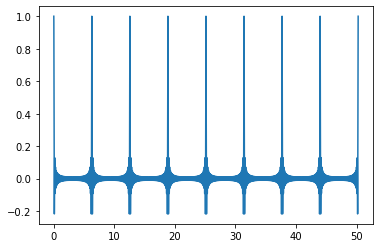

In [20]:
x = np.linspace(0, 16*np.pi, len(v_frictionData['210114_01'].data))
plt.plot(x, special.diric(x,101))

### データ全般
* 荷重，速度，片道のキョリ，サンプリングレート，リセット・スタート・ストップ時間は正しい？csvから自動で抜ける？

### 生データの描画
* 同じ条件でもsinと矩形で摩擦係数が大きく違う
* 矩形、chifure 1mmps のみN=1,2とN=3で傾向が違う、N=3だけノイズが小さい？
* chifureは往復で非対称性が大きい

### 速度と摩擦係数の相関
* 速度が速い時、負の相関がある
* 速度が遅い時、相関が消失

### 変位と摩擦係数の位相ズレ
* 速度が速い場合には方向変換をうまく抽出できていない
* 極大値が必ずしも方向変換時にない
* 矩形波でも変位が取れるとよい
* CreamBの40mmpsだけ位相ズレがある